In [3]:
import pandas as pd
import numpy as np
import os
from glob import glob
import random
import matplotlib.pylab as plt
import cv2
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.mobilenet import MobileNet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from PIL import Image
sns.set()
from tqdm import tqdm
%matplotlib inline

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import join, isfile, isdir
from glob import glob

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from PIL import Image
sns.set()
from tqdm import tqdm
%matplotlib inline

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

# Making Some Functions

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import SensitivityAtSpecificity


def test_metrics_with_best_model(checkpoint_filepath):

    # Specify the path to the saved model
    model_path = checkpoint_filepath

    # Load the model with the custom metric
    loaded_model = load_model(model_path, custom_objects=custom_objects)

    # Evaluate the model on the test dataset
    test_metrics = loaded_model.evaluate(test_generator, verbose=1)

    # Display the test metrics
    print(f'Test Metrics: {loaded_model.metrics_names[0]}: {test_metrics[0]}, {loaded_model.metrics_names[1]}: {test_metrics[1]}')


In [6]:
def plot_all_metrics():

    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    auc_roc = history.history['val_auc']
    precision = history.history['val_precision']
    recall = history.history['val_recall']
    tp = history.history['val_tp']
    tn = history.history['val_tn']
    fp = history.history['val_fp']
    fn = history.history['val_fn']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)

    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(epochs, auc_roc, 'b', label='AUC-ROC')
    plt.plot(epochs, precision, 'r', label='Precision')
    plt.plot(epochs, recall, 'g', label='Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('AUC-ROC, Precision, and Recall')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, tp, 'b', label='True Positives')
    plt.plot(epochs, fp, 'r', label='False Positives')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('True Positives and False Positives')
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(epochs, tn, 'g', label='True Negatives')
    plt.plot(epochs, fn, 'y', label='False Negatives')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('True Negatives and False Negatives')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [7]:
import matplotlib.pyplot as plt

def plot_accuracy():
    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)

    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
    plt.xlabel('Epochs', fontsize=24)  # Set fontsize for x-axis label
    plt.ylabel('Accuracy', fontsize=24)  # Set fontsize for y-axis label
    plt.title('Training and Validation Accuracy', fontsize=28)  # Set fontsize for title
    plt.legend(prop={'size': 16})  # Set fontsize for legend
    
    plt.xticks(fontsize=16)  # Set fontsize for x-axis ticks
    plt.yticks(fontsize=16) 
    
    plt.show()  # Display the plot

    

In [8]:
def plot_AUC_ROC():

    # Extract the metrics from the training history
    accuracy = history.history['accuracy']
    auc_roc = history.history['val_auc']
    precision = history.history['val_precision']
    recall = history.history['val_recall']

    # Create a list of epoch numbers
    epochs = range(1, len(accuracy) + 1)
    
    # Plot the metrics
    plt.figure(figsize=(18, 9))

    plt.plot(epochs, auc_roc, 'b', label='AUC-ROC')
    plt.plot(epochs, precision, 'r', label='Precision')
    plt.plot(epochs, recall, 'g', label='Recall')
    plt.xlabel('Epochs', fontsize=24)
    plt.ylabel('Metrics', fontsize=24)
    plt.title('AUC-ROC, Precision, and Recall', fontsize=28)
    plt.legend(prop={'size': 16})
    
    plt.xticks(fontsize=16)  # Set fontsize for x-axis ticks
    plt.yticks(fontsize=16) 
    
    plt.show()

In [9]:
def plot_loss():

    # Extract the loss from the training history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Create a list of epoch numbers
    epochs = range(1, len(loss) + 1)

    # Plot the loss
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()


In [10]:
def plot_confusion_matrix_raw_and_classification_report(model):

    from sklearn.metrics import confusion_matrix
    import numpy as np

    # Assuming you have a test generator that yields both images and labels
    #test_generator = get_generator(...)  # Replace ... with your actual parameters

    # Get the true labels and predictions from your model
    true_labels = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])
    predictions = model.predict_generator(test_generator).round()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels.argmax(axis=1), predictions.argmax(axis=1))

    print("Confusion Matrix:")
    print(conf_matrix)
    
    from sklearn.metrics import classification_report

    print(classification_report(true_labels, predictions))


In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels

def plot_colored_confusion_matrix(model):

    # Get the true labels and predictions from your model
    true_labels = np.concatenate([test_generator[i][1] for i in range(len(test_generator))])
    predictions = model.predict_generator(test_generator).round()

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(true_labels.argmax(axis=1), predictions.argmax(axis=1))

    # Function to plot a colored confusion matrix
    def plot_confusion_matrix(conf_matrix, classes, normalize=False, cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        if normalize:
            conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix'

        plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

    # Define class labels based on your problem
    class_labels = labels  # Modify as needed

    # Plot the colored confusion matrix
    plt.figure(figsize=(5, 5))
    plot_confusion_matrix(conf_matrix, classes=class_labels, normalize=True, cmap=plt.cm.Blues)
    plt.show()

In [12]:
def show_predicted_probabilities_for_one_example():

    # Predict the class probabilities for one batch of images
    batch_images, batch_labels = test_generator.next()
    print("actual label: ", batch_labels[0])
    a = labels[np.argmax(batch_labels[0])]
    print('Actual class: ', a)
    
    predictions = model.predict(batch_images)

    # Print the predicted probabilities for the first image in the batch
    print("Predicted Probabilities:")
    print(predictions[0])

    # Get the predicted class index for the first image
    predicted_class_index = np.argmax(predictions[0])

    # Assuming you have a label mapping for class names
    predicted_class_name = labels[predicted_class_index]  # Replace 'labels' with your actual label mapping

    print("Predicted Class:", predicted_class_name)

# Dataset Loading into image generator

In [13]:
#load and preprocessing the augmanted images
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import image_dataset_from_directory
import os
import zipfile
# Directory with our training pictures
train_chest = os.path.join(r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\2nd part of thesis dataset\SMOTE augmented 3 class training dataset")


from tensorflow.keras.preprocessing.image import ImageDataGenerator

#crate the image generator to (resize, normalize, filter and augmantation) images
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      #validation_split=0.2,
      fill_mode='nearest',
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True
      )


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_chest,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=8,
        #subset='training',
        # Since we use categorical_crossentropy loss,
        class_mode='categorical',
        shuffle=True)



Found 45087 images belonging to 3 classes.


In [14]:
val_chest = os.path.join(r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\2nd part of thesis dataset\4 diseases\Train dataset\SMOTE 3 class Val data")

val_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = val_datagen.flow_from_directory(
        val_chest, # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=8,
       # subset='validation',
        # Since we use categorical_crossentropy loss,
        class_mode='categorical',
        shuffle=True)

Found 3648 images belonging to 3 classes.


In [15]:
test_generator = validation_generator

In [16]:
# Print class distribution for the training generator
print("Training Generator Class Distribution:")
for class_name, class_index in train_generator.class_indices.items():
    num_images = sum(train_generator.classes == class_index)
    print(f"{class_name}: {num_images} images")

# Print class distribution for the validation generator
print("\nValidation Generator Class Distribution:")
for class_name, class_index in validation_generator.class_indices.items():
    num_images = sum(validation_generator.classes == class_index)
    print(f"{class_name}: {num_images} images")


Training Generator Class Distribution:
Pneumonia: 15029 images
Pneumothorax: 15029 images
Tuberculosis: 15029 images

Validation Generator Class Distribution:
Pneumonia: 1133 images
Pneumothorax: 1983 images
Tuberculosis: 532 images


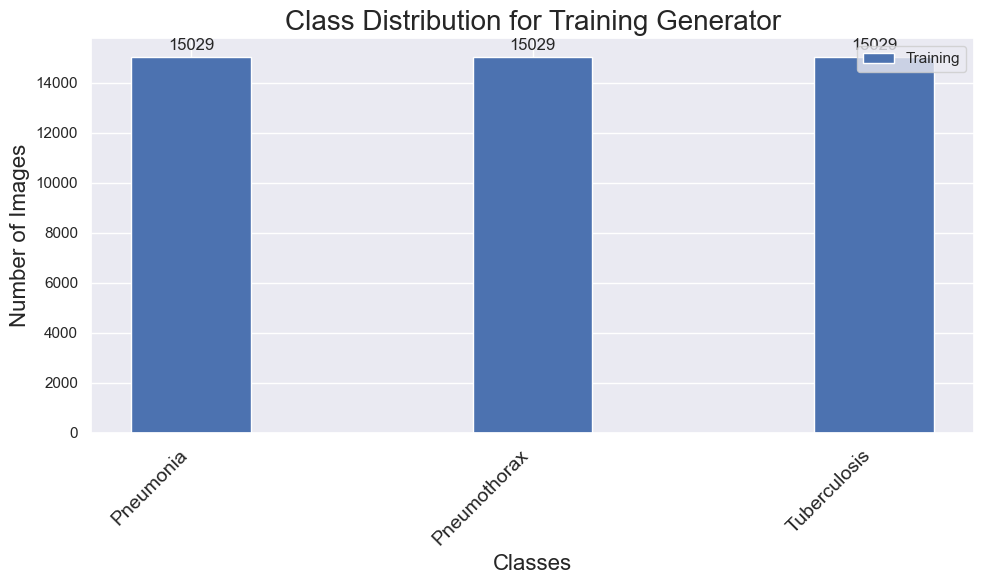

In [17]:
import matplotlib.pyplot as plt

# Get class distribution for the training generator
train_class_distribution = {class_name: sum(train_generator.classes == class_index) 
                             for class_name, class_index in train_generator.class_indices.items()}

# Prepare data for plotting
class_names = list(train_class_distribution.keys())
train_counts = list(train_class_distribution.values())

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(class_names))

train_bars = ax.bar(index, train_counts, bar_width, label='Training')

ax.set_xlabel('Classes', fontsize = 16)
ax.set_ylabel('Number of Images', fontsize = 16)
ax.set_title('Class Distribution for Training Generator', fontsize = 20)
ax.set_xticks([i for i in index])
ax.set_xticklabels(class_names, rotation=45, ha='right', fontsize = 14)
ax.legend()

# Add counts on top of the bars
for bar in train_bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


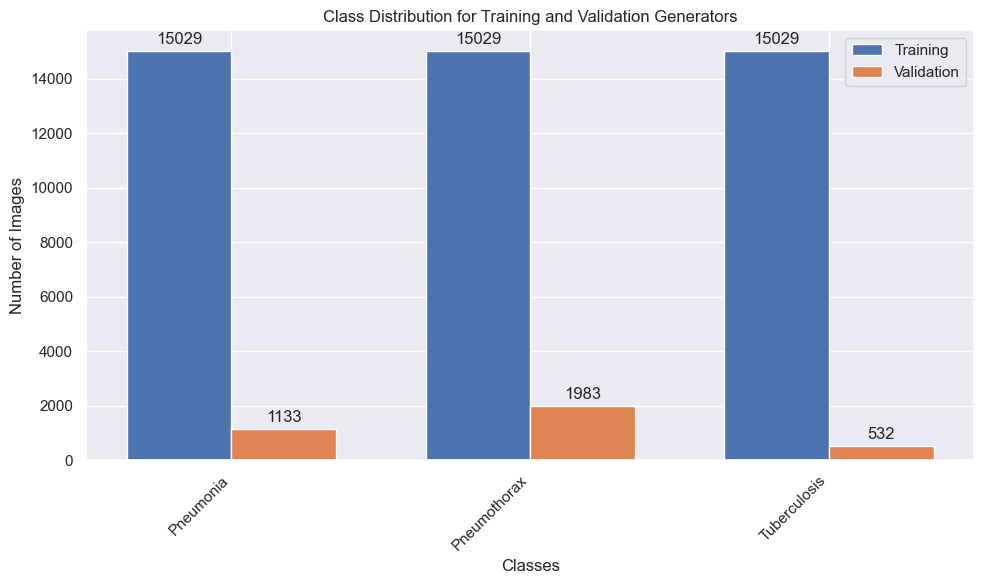

In [43]:
import matplotlib.pyplot as plt

# Get class distribution for the training generator
train_class_distribution = {class_name: sum(train_generator.classes == class_index) 
                             for class_name, class_index in train_generator.class_indices.items()}

# Get class distribution for the validation generator
validation_class_distribution = {class_name: sum(validation_generator.classes == class_index) 
                                 for class_name, class_index in validation_generator.class_indices.items()}

# Prepare data for plotting
class_names = list(train_class_distribution.keys())
train_counts = list(train_class_distribution.values())
validation_counts = list(validation_class_distribution.values())

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(class_names))

train_bars = ax.bar(index, train_counts, bar_width, label='Training')
validation_bars = ax.bar([i + bar_width for i in index], validation_counts, bar_width, label='Validation')

ax.set_xlabel('Classes')
ax.set_ylabel('Number of Images')
ax.set_title('Class Distribution for Training and Validation Generators')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend()

# Add counts on top of the bars
for bar in train_bars + validation_bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
import os

# Dataset directory containing subdirectories for each class
dataset_dir = train_chest

# Get the list of subdirectories (classes) and count the number of classes
class_folders = os.listdir(dataset_dir)
num_classes = len(class_folders)

# Store the class names in a list
labels = class_folders

# Print the number of classes
print("Number of classes:", num_classes)

# Print the names of the folders (classes)
print("Class names:", labels)


Number of classes: 3
Class names: ['Pneumonia', 'Pneumothorax', 'Tuberculosis']


# Model

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the pre-trained InceptionV3 model with weights pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers[:]:
    layer.trainable = False

# Freeze the layers of the pre-trained model
for layer in base_model.layers[-22:]:
    layer.trainable = True


# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(base_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x) 

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2

# Add a final sigmoid layer for classification
output = Dense(3, activation='softmax')(x)

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [18]:
from tensorflow.keras.optimizers import Adamax

#opt = RMSprop(learning_rate=0.001)
#opt = SGD(lr= 0.00006, momentum=0.9)
opt = Adamax(lr= 0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

checkpoint_filepath = 'multi_classification_inceptionV3_with_22LayerTrainable_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

c:\Users\musan\.conda\envs\thesis\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
5658/5658 [==============================] - ETA: 0s - loss: 7.8001 - accuracy: 0.8445 - tp: 37333.0000 - fp: 6080.0000 - tn: 84440.0000 - fn: 7927.0000 - precision: 0.8599 - recall: 0.8249 - auc: 0.9567
Epoch 1: val_loss improved from inf to 2.20949, saving model to multi_classification_inceptionV3_with_22LayerTrainable_best_model.h5
5658/5658 [==============================] - 990s 173ms/step - loss: 7.8001 - accuracy: 0.8445 - tp: 37333.0000 - fp: 6080.0000 - tn: 84440.0000 - fn: 7927.0000 - precision: 0.8599 - recall: 0.8249 - auc: 0.9567 - val_loss: 2.2095 - val_accuracy: 0.8871 - val_tp: 3222.0000 - val_fp: 396.0000 - val_tn: 6900.0000 - val_fn: 426.0000 - val_precision: 0.8905 - val_recall: 0.8832 - val_auc: 0.9730
Epoch 2/30
5658/5658 [==============================] - ETA: 0s - loss: 1.3498 - accuracy: 0.8741 - tp: 39083.0000 - fp: 5106.0000 - tn: 85414.0000 - fn: 6177.0000 - precision: 0.8845 - recall: 0.8635 - auc: 0.9715
Epoch 2: val_loss improved from 2.20949 to

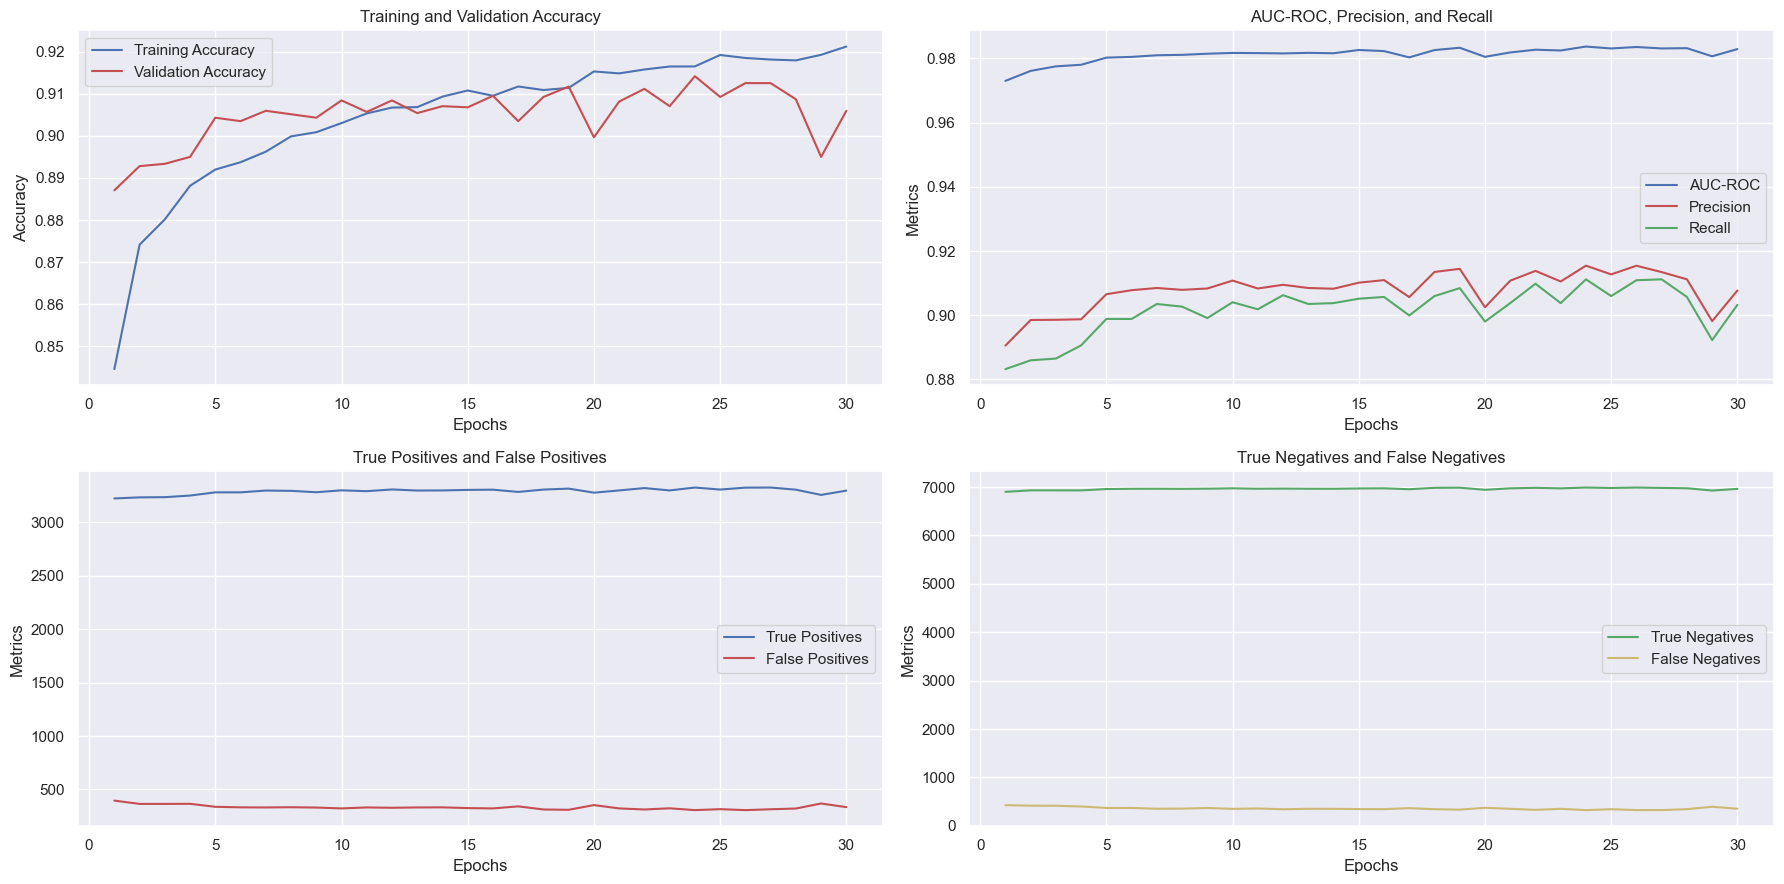

In [19]:
plot_all_metrics()

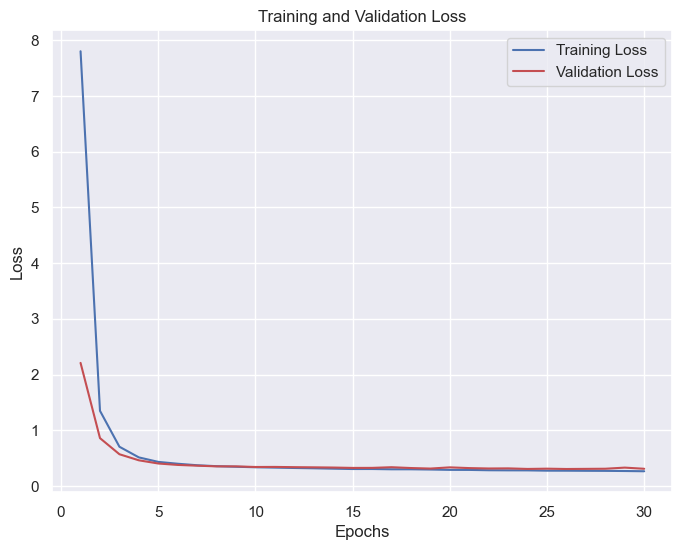

In [20]:
plot_loss()

In [21]:
plot_confusion_matrix_raw_and_classification_report(model)

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 931  201    1]
 [  97 1861   25]
 [   9   17  506]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1133
           1       0.90      0.94      0.92      1983
           2       0.95      0.95      0.95       532

   micro avg       0.91      0.90      0.91      3648
   macro avg       0.92      0.90      0.91      3648
weighted avg       0.91      0.90      0.90      3648
 samples avg       0.90      0.90      0.90      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_21104\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


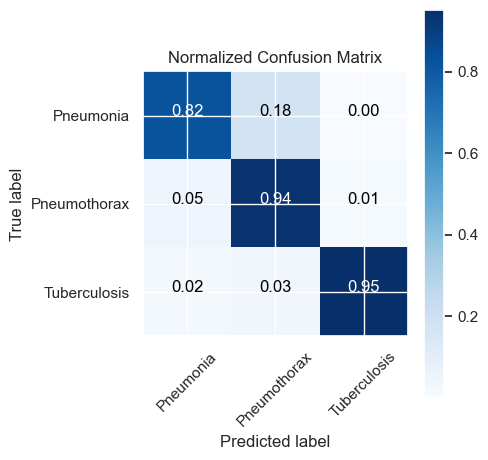

In [22]:
plot_colored_confusion_matrix(model)

In [38]:
show_predicted_probabilities_for_one_example()

actual label:  [0. 1. 0.]
Actual class:  Pneumothorax
1/1 [==============================] - 0s 34ms/step
Predicted Probabilities:
[0.27770332 0.71804106 0.00425563]
Predicted Class: Pneumothorax


In [33]:
best_model = load_model('multi_classification_inceptionV3_with_22LayerTrainable_best_model.h5')

In [25]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 926  207    0]
 [  69 1901   13]
 [   8   23  501]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1133
           1       0.89      0.96      0.92      1983
           2       0.97      0.94      0.96       532

   micro avg       0.92      0.91      0.91      3648
   macro avg       0.93      0.90      0.92      3648
weighted avg       0.92      0.91      0.91      3648
 samples avg       0.91      0.91      0.91      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_21104\467558738.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(test_generator).round()


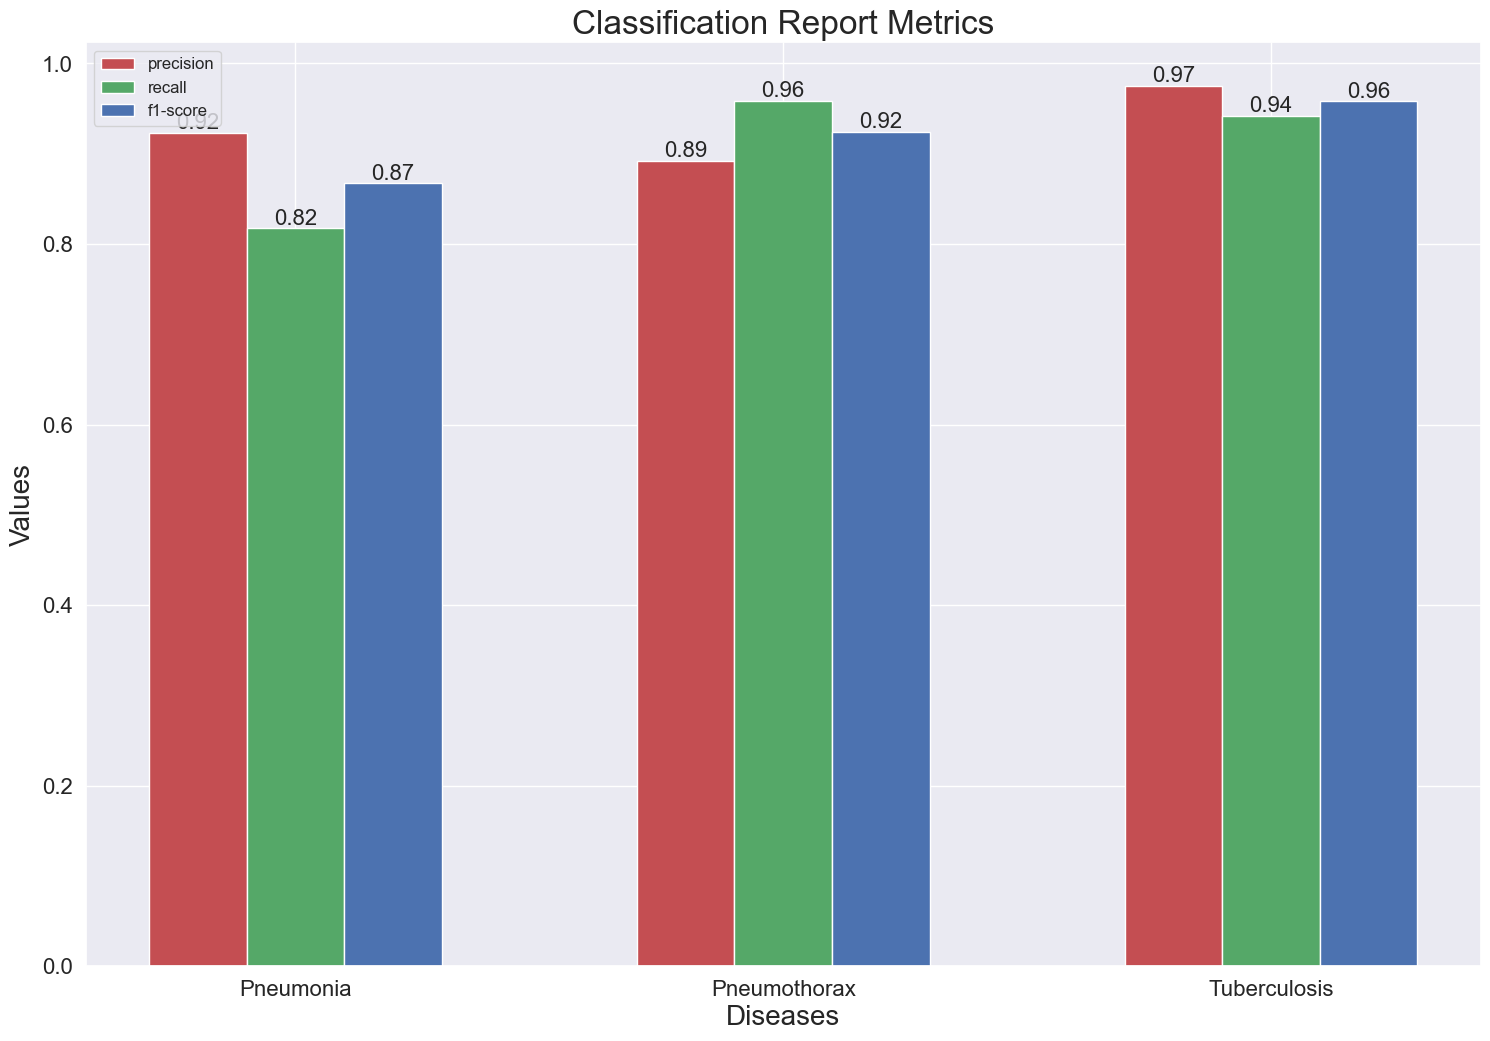

In [41]:
# Extract data for plotting
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels and predictions from your model
true_labels = np.concatenate([test_generator[i][1]
                             for i in range(len(test_generator))])
predictions = best_model.predict_generator(test_generator).round()

# Assuming you have already obtained the classification report
# classification_report(predictions, true_labels)
classification_report_str = classification_report(
    true_labels.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)

categories = ['0', '1', '2']

metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(categories), len(metrics)))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        values[i, j] = classification_report_str[category][metric]

# Create bar plot
fig, ax = plt.subplots(figsize=(18,12))

bar_width = 0.2
index = np.arange(len(categories))
colors = ['r', 'g', 'b']

for i in range(len(metrics)):
    ax.bar(index + i * bar_width,
           values[:, i], bar_width, label=metrics[i], color=colors[i])
    for j, value in enumerate(values[:, i]):
        ax.text(index[j] + i * bar_width, value, str(round(value, 2)),
                ha='center', va='bottom', fontsize=16)

ax.set_xlabel('Diseases', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Classification Report Metrics', fontsize=24)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=12)

plt.show()

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


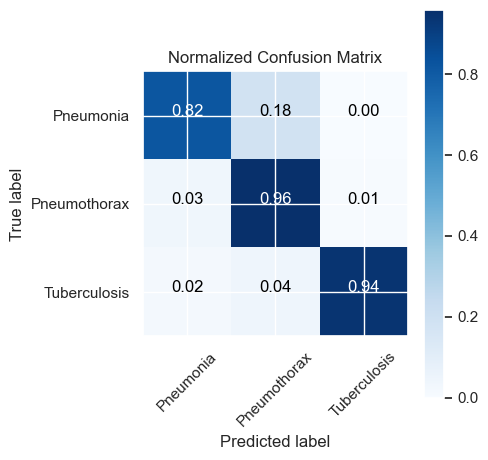

In [26]:
plot_colored_confusion_matrix(best_model)

In [39]:
class_weights = np.array([2, 1, 1])

In [42]:
checkpoint_filepath = 'class_weights_multi_classification_inceptionV3_with_22LayerTrainable_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = best_model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

Epoch 1/10
5658/5658 [==============================] - ETA: 0s - loss: 0.3549 - accuracy: 0.9128 - tp: 41074.0000 - fp: 3700.0000 - tn: 86820.0000 - fn: 4186.0000 - precision: 0.9174 - recall: 0.9075 - auc: 0.9873
Epoch 1: val_loss improved from inf to 0.33121, saving model to class_weights_multi_classification_inceptionV3_with_22LayerTrainable_best_model.h5
5658/5658 [==============================] - 907s 160ms/step - loss: 0.3549 - accuracy: 0.9128 - tp: 41074.0000 - fp: 3700.0000 - tn: 86820.0000 - fn: 4186.0000 - precision: 0.9174 - recall: 0.9075 - auc: 0.9873 - val_loss: 0.3312 - val_accuracy: 0.8967 - val_tp: 3253.0000 - val_fp: 356.0000 - val_tn: 6940.0000 - val_fn: 395.0000 - val_precision: 0.9014 - val_recall: 0.8917 - val_auc: 0.9806
Epoch 2/10
5658/5658 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.9137 - tp: 41149.0000 - fp: 3678.0000 - tn: 86842.0000 - fn: 4111.0000 - precision: 0.9180 - recall: 0.9092 - auc: 0.9876
Epoch 2: val_loss did not im

In [45]:
checkpoint_filepath = '2nd_portion_multi_classification_inceptionV3_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Mode is set to minimize
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

Epoch 1/10
5658/5658 [==============================] - ETA: 0s - loss: 0.2947 - accuracy: 0.9130 - tp: 41097.0000 - fp: 3709.0000 - tn: 86811.0000 - fn: 4163.0000 - precision: 0.9172 - recall: 0.9080 - auc: 0.9868
Epoch 1: val_loss improved from inf to 0.31872, saving model to 2nd_portion_multi_classification_inceptionV3_best_model.h5
5658/5658 [==============================] - 850s 150ms/step - loss: 0.2947 - accuracy: 0.9130 - tp: 41097.0000 - fp: 3709.0000 - tn: 86811.0000 - fn: 4163.0000 - precision: 0.9172 - recall: 0.9080 - auc: 0.9868 - val_loss: 0.3187 - val_accuracy: 0.9090 - val_tp: 3310.0000 - val_fp: 322.0000 - val_tn: 6974.0000 - val_fn: 338.0000 - val_precision: 0.9113 - val_recall: 0.9073 - val_auc: 0.9827
Epoch 2/10
5658/5658 [==============================] - ETA: 0s - loss: 0.2923 - accuracy: 0.9147 - tp: 41224.0000 - fp: 3636.0000 - tn: 86884.0000 - fn: 4036.0000 - precision: 0.9189 - recall: 0.9108 - auc: 0.9869
Epoch 2: val_loss improved from 0.31872 to 0.31558, 

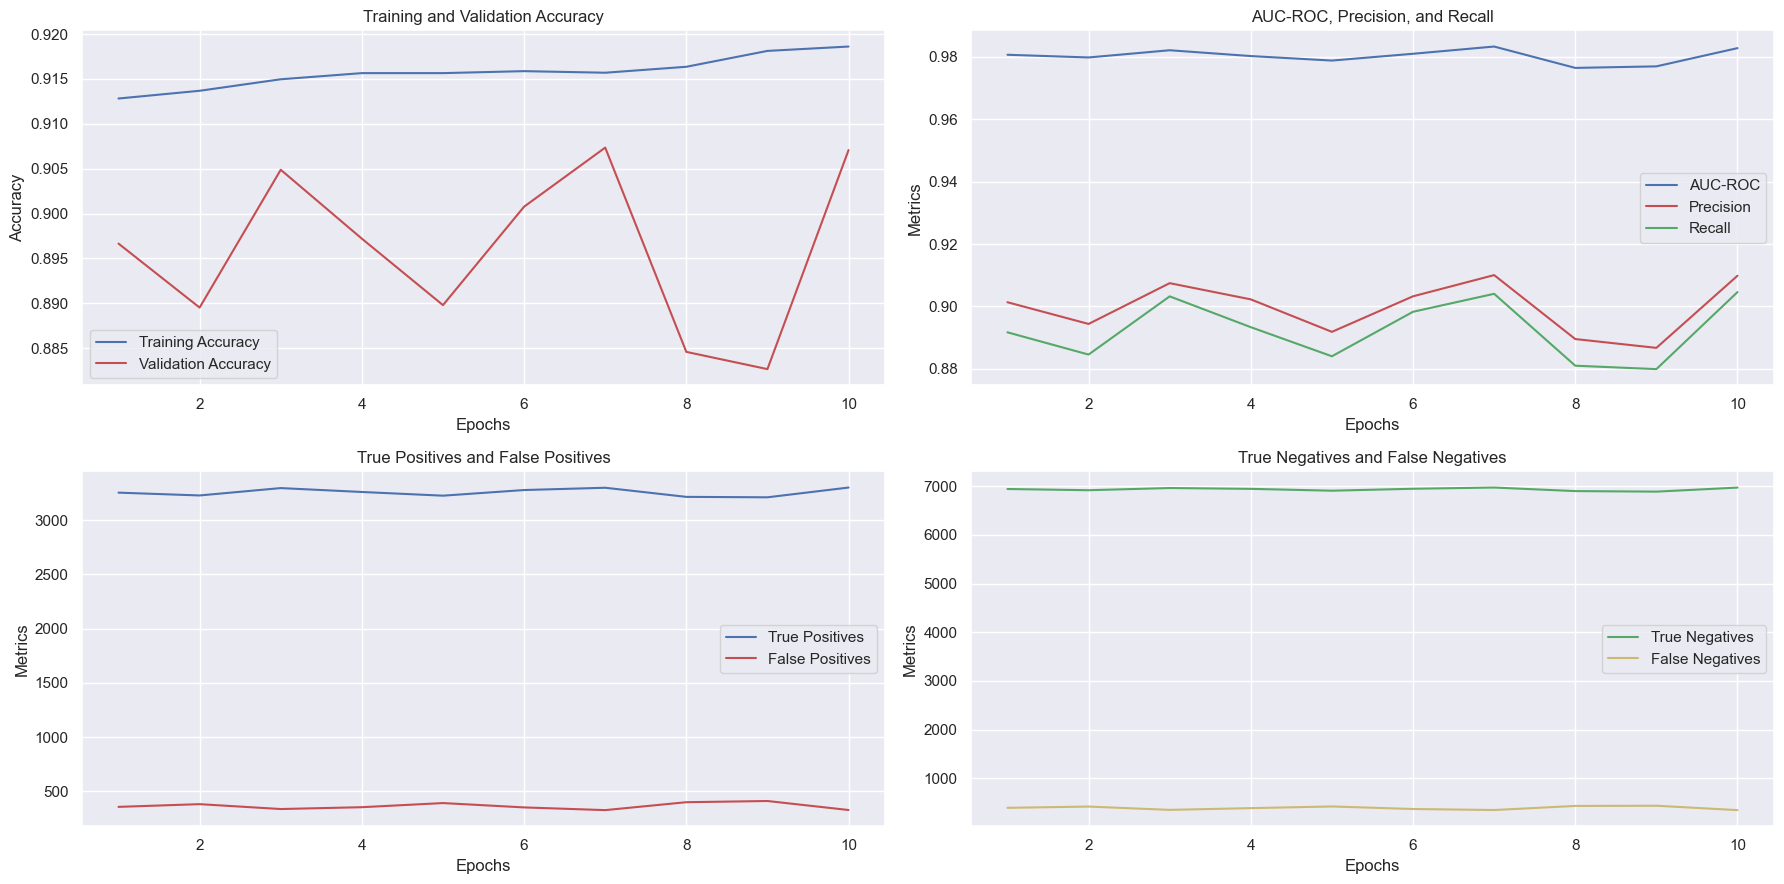

In [45]:
plot_all_metrics()

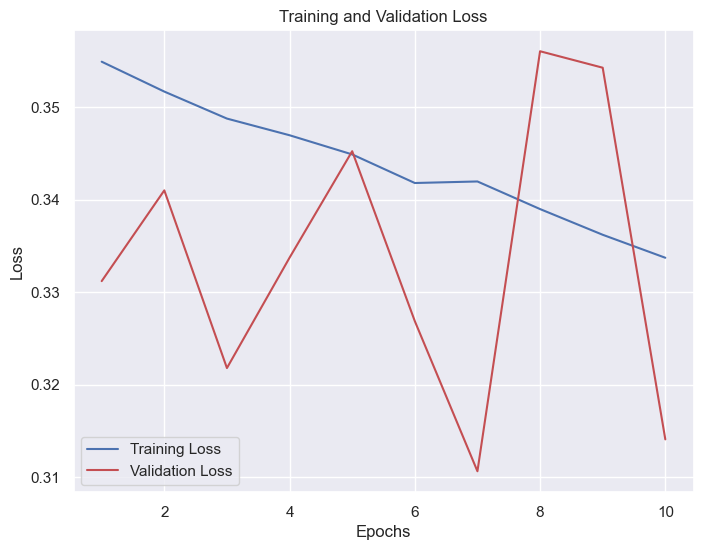

In [46]:
plot_loss()

In [47]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 944  189    0]
 [ 110 1865    8]
 [  10   28  494]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1133
           1       0.90      0.94      0.92      1983
           2       0.98      0.93      0.96       532

   micro avg       0.91      0.90      0.91      3648
   macro avg       0.93      0.90      0.91      3648
weighted avg       0.91      0.90      0.91      3648
 samples avg       0.90      0.90      0.90      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
best_model = load_model('2nd_portion_multi_classification_inceptionV3_best_model.h5')

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\467558738.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(test_generator).round()


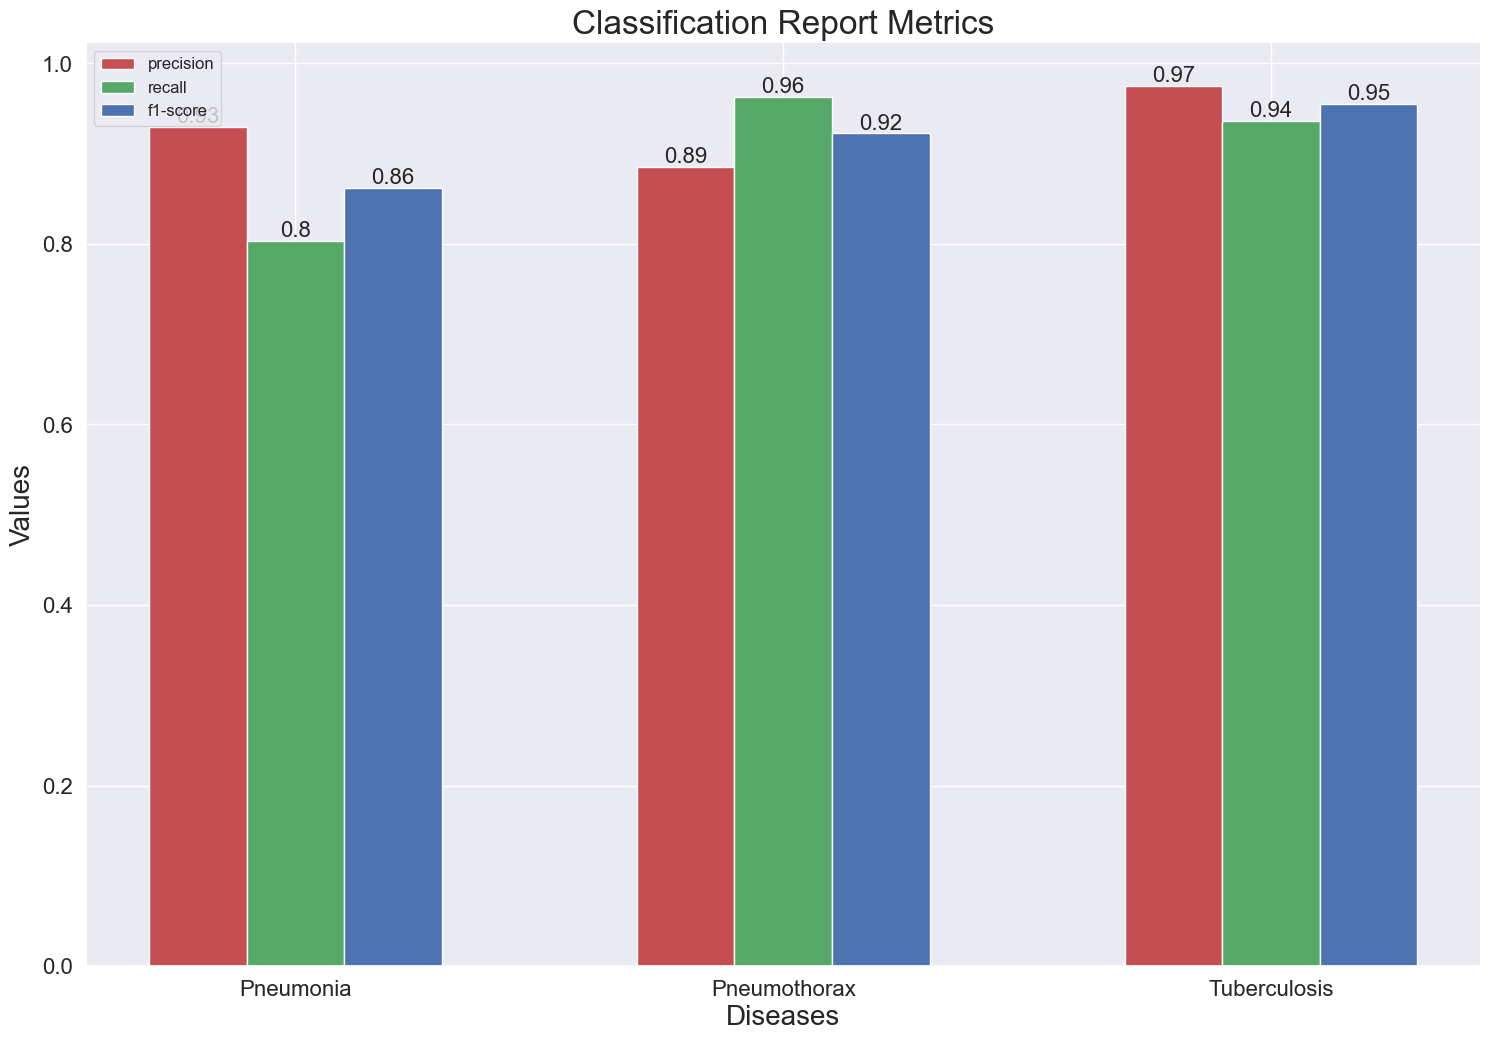

In [51]:
# Extract data for plotting
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels and predictions from your model
true_labels = np.concatenate([test_generator[i][1]
                             for i in range(len(test_generator))])
predictions = best_model.predict_generator(test_generator).round()

# Assuming you have already obtained the classification report
# classification_report(predictions, true_labels)
classification_report_str = classification_report(
    true_labels.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)

categories = ['0', '1', '2']

metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(categories), len(metrics)))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        values[i, j] = classification_report_str[category][metric]

# Create bar plot
fig, ax = plt.subplots(figsize=(18,12))

bar_width = 0.2
index = np.arange(len(categories))
colors = ['r', 'g', 'b']

for i in range(len(metrics)):
    ax.bar(index + i * bar_width,
           values[:, i], bar_width, label=metrics[i], color=colors[i])
    for j, value in enumerate(values[:, i]):
        ax.text(index[j] + i * bar_width, value, str(round(value, 2)),
                ha='center', va='bottom', fontsize=16)

ax.set_xlabel('Diseases', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Classification Report Metrics', fontsize=24)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=12)

plt.show()

C:\Users\musan\AppData\Local\Temp\ipykernel_21104\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


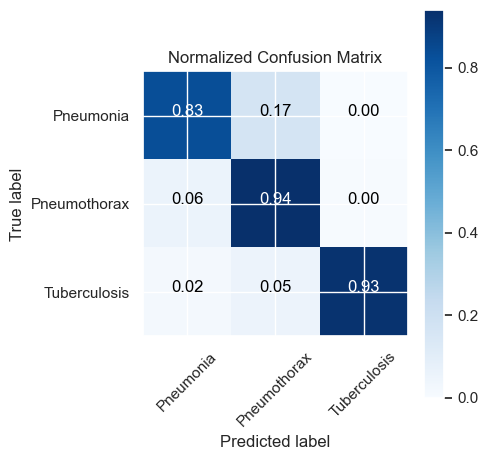

In [48]:
plot_colored_confusion_matrix(best_model)

In [52]:
checkpoint_filepath = '2nd_portion_multi_classification_inceptionV3_best_model_2.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Mode is set to minimize
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

Epoch 1/10
5658/5658 [==============================] - ETA: 0s - loss: 0.3441 - accuracy: 0.9139 - tp: 41159.0000 - fp: 3661.0000 - tn: 86859.0000 - fn: 4101.0000 - precision: 0.9183 - recall: 0.9094 - auc: 0.9881
Epoch 1: val_loss improved from inf to 0.39352, saving model to 2nd_portion_multi_classification_inceptionV3_best_model_2.h5
5658/5658 [==============================] - 926s 163ms/step - loss: 0.3441 - accuracy: 0.9139 - tp: 41159.0000 - fp: 3661.0000 - tn: 86859.0000 - fn: 4101.0000 - precision: 0.9183 - recall: 0.9094 - auc: 0.9881 - val_loss: 0.3935 - val_accuracy: 0.8690 - val_tp: 3154.0000 - val_fp: 459.0000 - val_tn: 6837.0000 - val_fn: 494.0000 - val_precision: 0.8730 - val_recall: 0.8646 - val_auc: 0.9701
Epoch 2/10
5658/5658 [==============================] - ETA: 0s - loss: 0.3421 - accuracy: 0.9162 - tp: 41269.0000 - fp: 3560.0000 - tn: 86960.0000 - fn: 3991.0000 - precision: 0.9206 - recall: 0.9118 - auc: 0.9883
Epoch 2: val_loss improved from 0.39352 to 0.35110

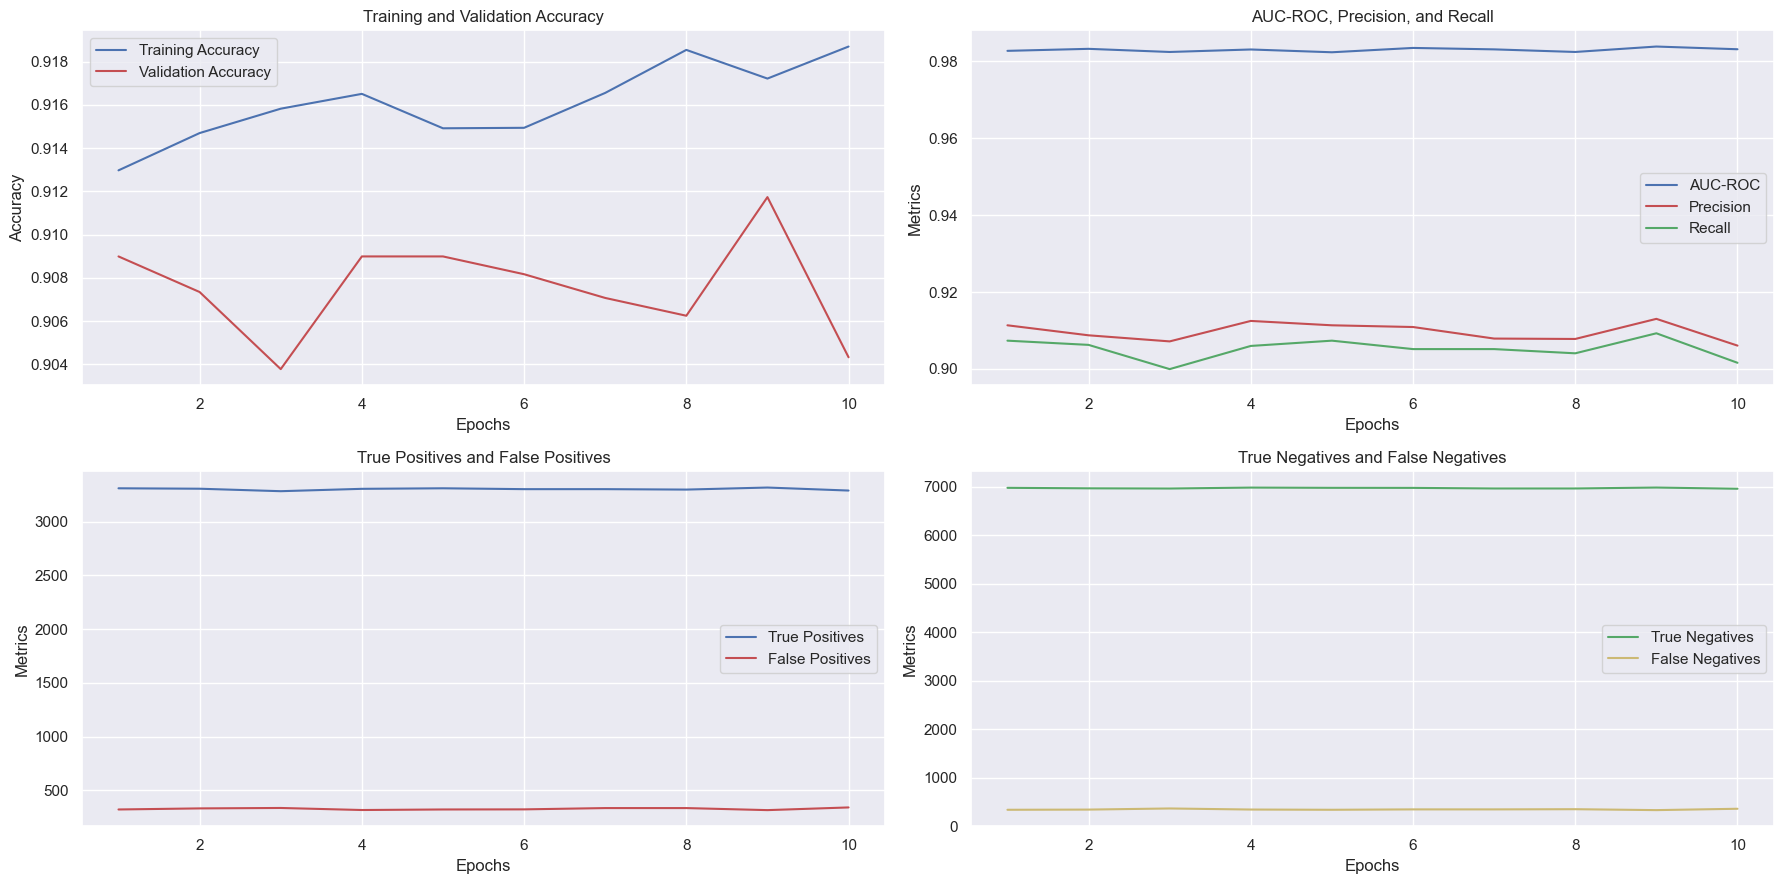

In [46]:
plot_all_metrics()

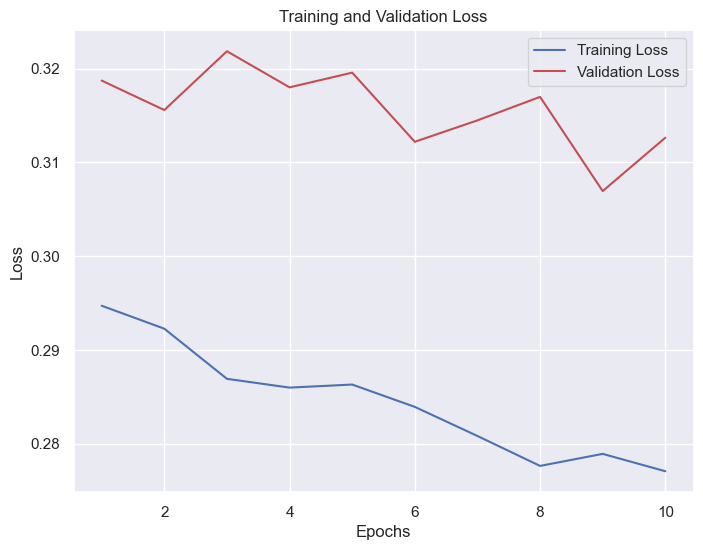

In [47]:
plot_loss()

In [48]:
plot_confusion_matrix_raw_and_classification_report(model)

C:\Users\musan\AppData\Local\Temp\ipykernel_23952\883837692.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 936  196    1]
 [ 115 1857   11]
 [  11   24  497]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1044
           1       0.94      0.89      0.91      2077
           2       0.93      0.98      0.95       509

   micro avg       0.90      0.91      0.90      3630
   macro avg       0.90      0.92      0.91      3630
weighted avg       0.90      0.91      0.90      3630
 samples avg       0.90      0.90      0.90      3630



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_23952\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


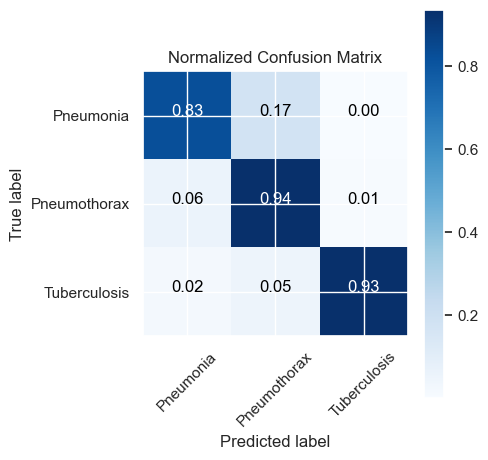

In [49]:
plot_colored_confusion_matrix(model)

In [51]:
best_model = load_model('2nd_portion_multi_classification_inceptionV3_best_model.h5')

In [52]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_23952\883837692.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 910  223    0]
 [  60 1910   13]
 [   9   25  498]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.87       964
           1       0.96      0.89      0.92      2158
           2       0.94      0.97      0.95       511

   micro avg       0.91      0.91      0.91      3633
   macro avg       0.90      0.93      0.91      3633
weighted avg       0.92      0.91      0.91      3633
 samples avg       0.91      0.91      0.91      3633



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_23952\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


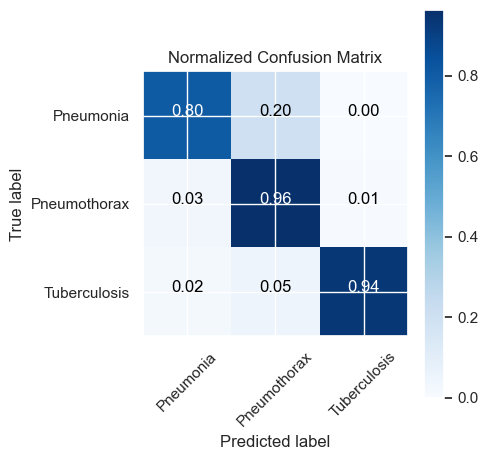

In [53]:
plot_colored_confusion_matrix(best_model)

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load the pre-trained InceptionV3 model with weights pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

for layer in base_model.layers:
    layer.trainable = False

last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = Conv2D(128, (3, 3), activation='relu', padding='same')(last_output)
# Add BatchNormalization layer
x = BatchNormalization()(x)
# Add MaxPooling2D layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Add another Conv2D layer
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# Add BatchNormalization layer
x = BatchNormalization()(x)
# Add MaxPooling2D layer
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
# Add BatchNormalization layer
x = BatchNormalization()(x)
# Add MaxPooling2D layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Add another Conv2D layer
x = Conv2D(1024, (3, 3), activation='relu', padding='same')(x)
# Add BatchNormalization layer
x = BatchNormalization()(x)
# Add MaxPooling2D layer
x = MaxPooling2D((2, 2), padding='same')(x)

# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x) 

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2

# Add a final sigmoid layer for classification
output = Dense(3, activation='softmax')(x)

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

model.summary()

last layer output shape:  (None, 12, 12, 768)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_192 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_192 (Batch  (None, 111, 111, 32  96         ['conv2d_192[0][0]']             
 Normalization)                 )             

In [26]:

from tensorflow.keras.optimizers import Adamax

#opt = RMSprop(learning_rate=0.001)
#opt = SGD(lr= 0.00006, momentum=0.9)
opt = Adamax(lr= 0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

checkpoint_filepath = 'multi_modified_inceptionV3_with_22LayerTrainable_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

Epoch 1/10
5658/5658 [==============================] - ETA: 0s - loss: 0.4238 - accuracy: 0.9159 - tp: 41338.0000 - fp: 3670.0000 - tn: 86850.0000 - fn: 3922.0000 - precision: 0.9185 - recall: 0.9133 - auc: 0.9883
Epoch 1: val_loss improved from inf to 0.38735, saving model to multi_modified_inceptionV3_with_22LayerTrainable_best_model.h5
5658/5658 [==============================] - 893s 157ms/step - loss: 0.4238 - accuracy: 0.9159 - tp: 41338.0000 - fp: 3670.0000 - tn: 86850.0000 - fn: 3922.0000 - precision: 0.9185 - recall: 0.9133 - auc: 0.9883 - val_loss: 0.3873 - val_accuracy: 0.9043 - val_tp: 3292.0000 - val_fp: 343.0000 - val_tn: 6953.0000 - val_fn: 356.0000 - val_precision: 0.9056 - val_recall: 0.9024 - val_auc: 0.9852
Epoch 2/10
5658/5658 [==============================] - ETA: 0s - loss: 0.3216 - accuracy: 0.9224 - tp: 41617.0000 - fp: 3401.0000 - tn: 87119.0000 - fn: 3643.0000 - precision: 0.9245 - recall: 0.9195 - auc: 0.9897
Epoch 2: val_loss improved from 0.38735 to 0.325

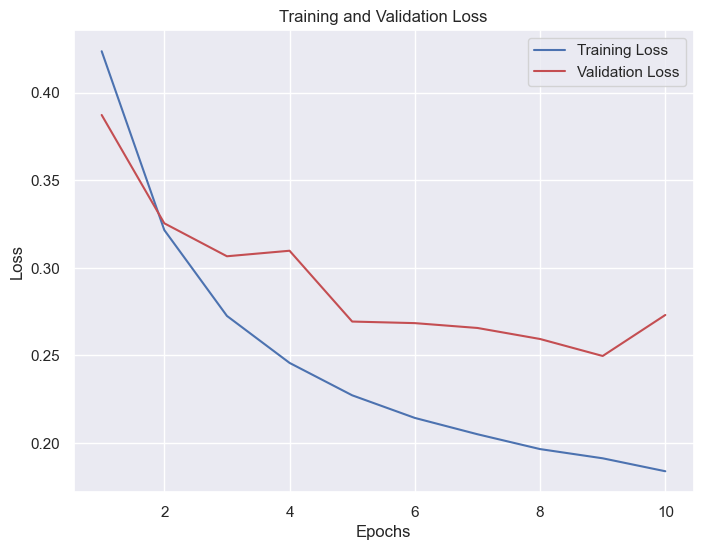

In [27]:
plot_loss()

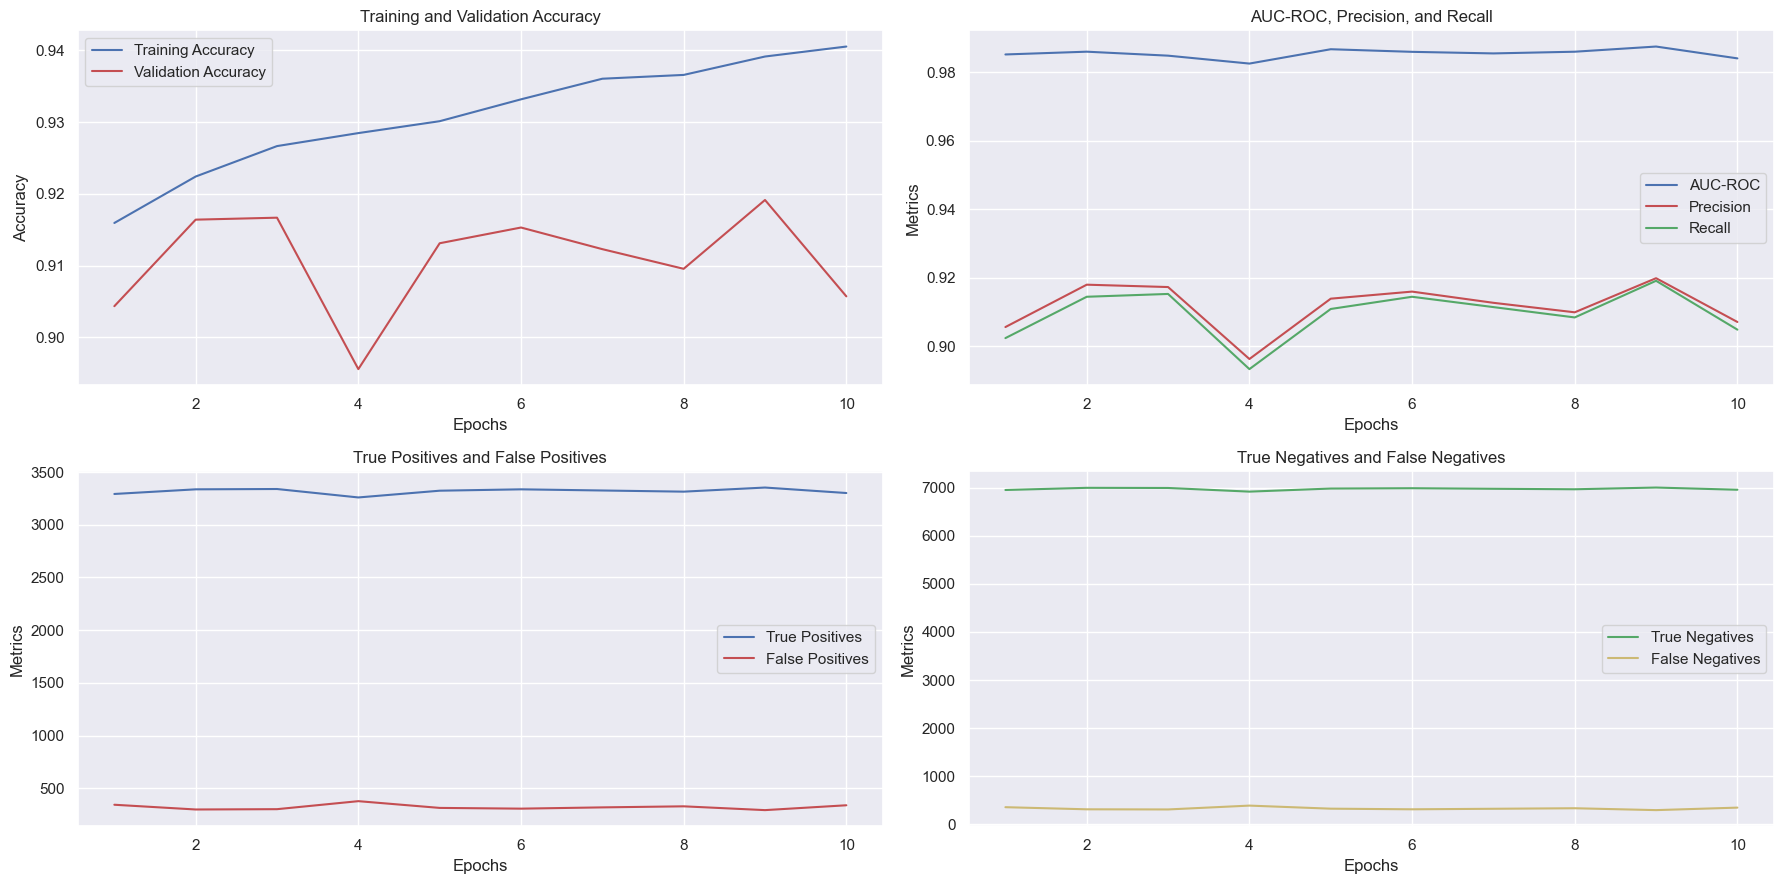

In [29]:
plot_all_metrics()

In [31]:
plot_confusion_matrix_raw_and_classification_report(model)

C:\Users\musan\AppData\Local\Temp\ipykernel_3116\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 955  178    0]
 [ 125 1857    1]
 [   8   35  489]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1133
           1       0.90      0.94      0.92      1983
           2       1.00      0.92      0.96       532

   micro avg       0.91      0.90      0.91      3648
   macro avg       0.93      0.90      0.91      3648
weighted avg       0.91      0.90      0.91      3648
 samples avg       0.90      0.90      0.90      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_3116\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


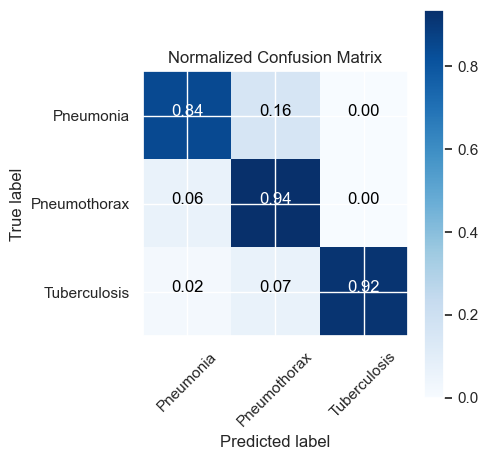

In [32]:
plot_colored_confusion_matrix(model)

In [68]:
best_model = load_model('multi_modified_inceptionV3_with_22LayerTrainable_best_model.h5')

C:\Users\musan\AppData\Local\Temp\ipykernel_3116\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


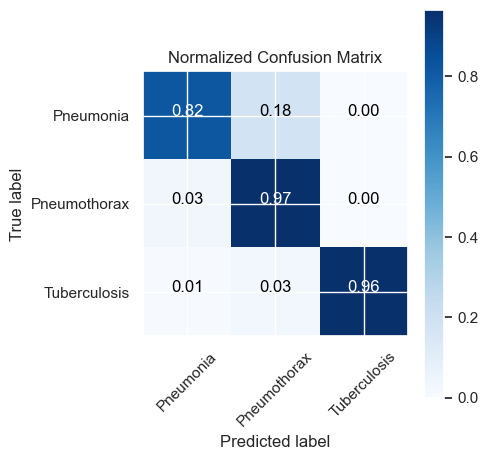

In [70]:
plot_colored_confusion_matrix(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_3116\467558738.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = best_model.predict_generator(test_generator).round()


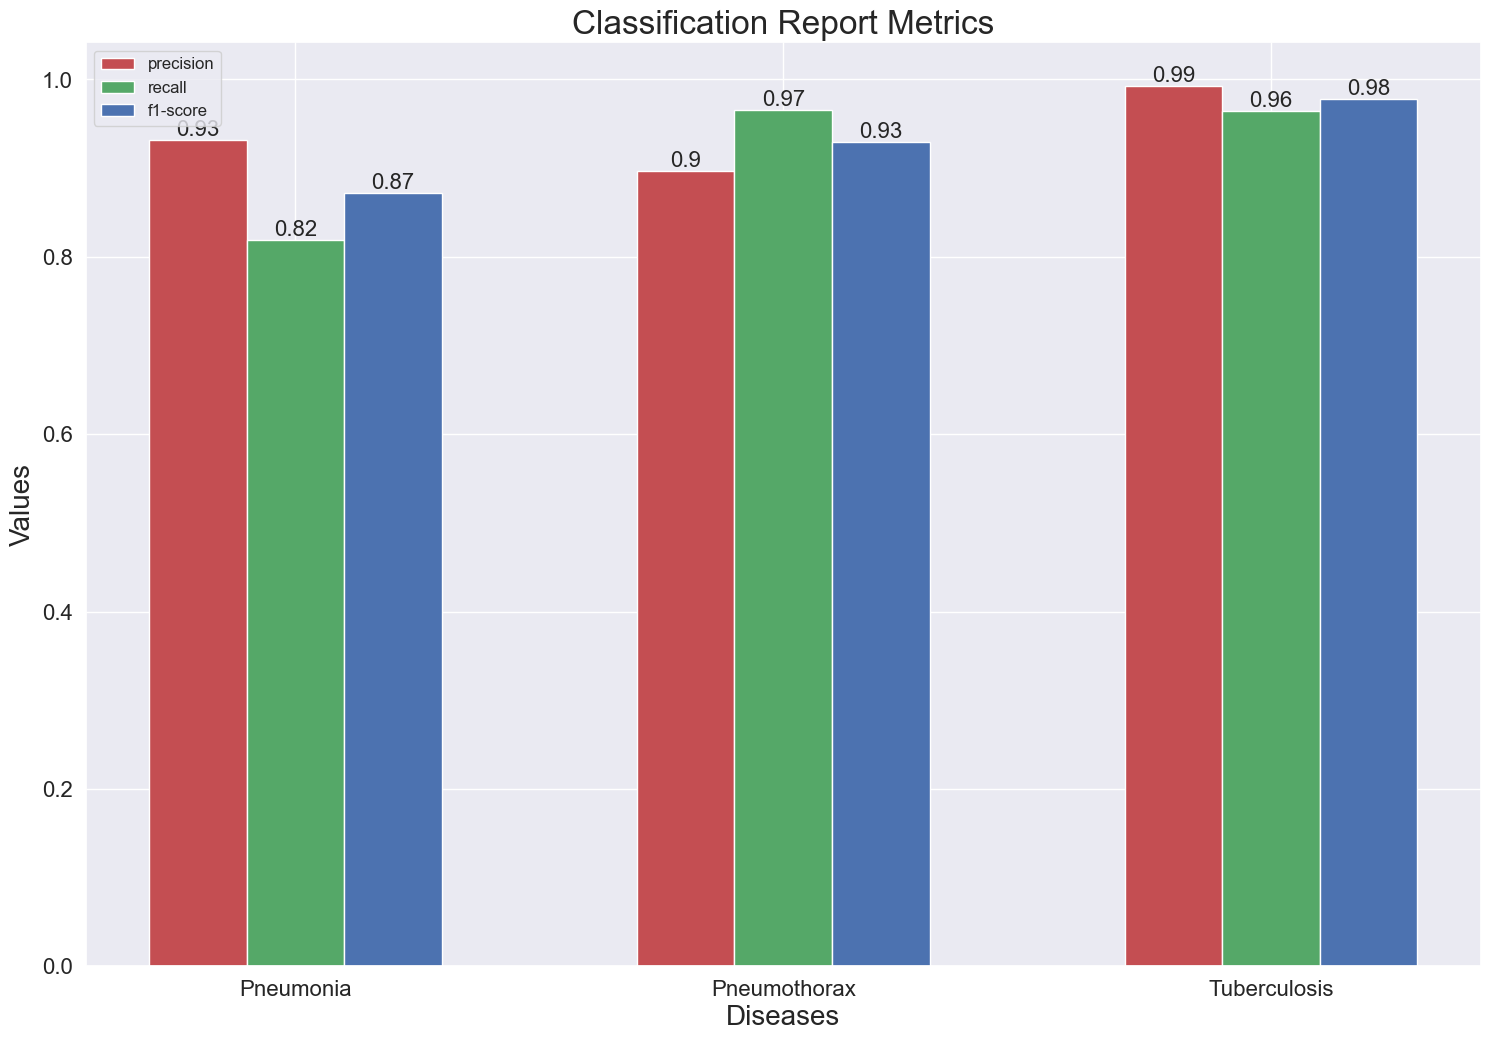

In [69]:
# Extract data for plotting
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels and predictions from your model
true_labels = np.concatenate([test_generator[i][1]
                             for i in range(len(test_generator))])
predictions = best_model.predict_generator(test_generator).round()

# Assuming you have already obtained the classification report
# classification_report(predictions, true_labels)
classification_report_str = classification_report(
    true_labels.argmax(axis=1), predictions.argmax(axis=1), output_dict=True)

categories = ['0', '1', '2']

metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(categories), len(metrics)))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        values[i, j] = classification_report_str[category][metric]

# Create bar plot
fig, ax = plt.subplots(figsize=(18,12))

bar_width = 0.2
index = np.arange(len(categories))
colors = ['r', 'g', 'b']

for i in range(len(metrics)):
    ax.bar(index + i * bar_width,
           values[:, i], bar_width, label=metrics[i], color=colors[i])
    for j, value in enumerate(values[:, i]):
        ax.text(index[j] + i * bar_width, value, str(round(value, 2)),
                ha='center', va='bottom', fontsize=16)

ax.set_xlabel('Diseases', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Classification Report Metrics', fontsize=24)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=12)

plt.show()

In [71]:
classification_report_str

{'0': {'precision': 0.9317269076305221,
  'recall': 0.8190644307149162,
  'f1-score': 0.8717707844058243,
  'support': 1133.0},
 '1': {'precision': 0.8964871194379391,
  'recall': 0.9652042360060514,
  'f1-score': 0.9295774647887323,
  'support': 1983.0},
 '2': {'precision': 0.9922630560928434,
  'recall': 0.9642857142857143,
  'f1-score': 0.9780743565300287,
  'support': 532.0},
 'accuracy': 0.9196820175438597,
 'macro avg': {'precision': 0.9401590277204349,
  'recall': 0.916184793668894,
  'f1-score': 0.9264742019081952,
  'support': 3648.0},
 'weighted avg': {'precision': 0.9213992571360218,
  'recall': 0.9196820175438597,
  'f1-score': 0.918696263454449,
  'support': 3648.0}}

In [72]:
classification_report_str = {'0': {'precision': 1.00,
       'recall': 0.95,
       'f1-score': 0.97,
       'support': 3840},
       '1': {'precision': 0.98,
       'recall': 1.00,
       'f1-score': 0.99,
       'support': 11846}
       }

In [74]:
labels = ["Abnormal", "Normal"]

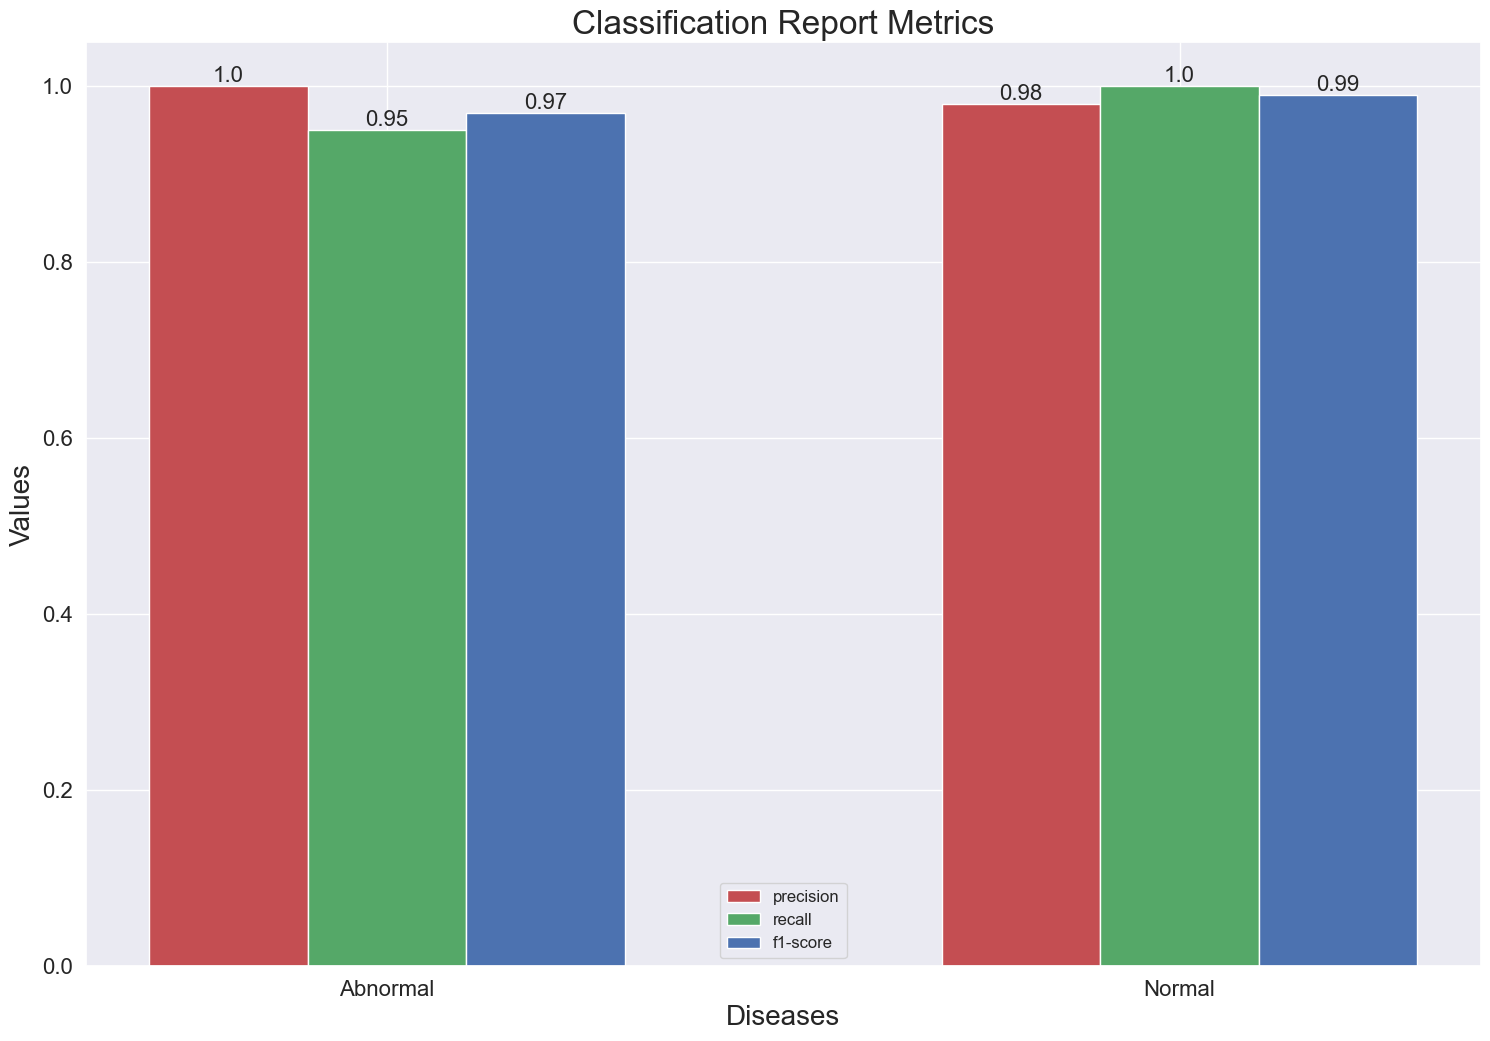

In [75]:
categories = ['0', '1']

metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(categories), len(metrics)))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        values[i, j] = classification_report_str[category][metric]

# Create bar plot
fig, ax = plt.subplots(figsize=(18,12))

bar_width = 0.2
index = np.arange(len(categories))
colors = ['r', 'g', 'b']

for i in range(len(metrics)):
    ax.bar(index + i * bar_width,
           values[:, i], bar_width, label=metrics[i], color=colors[i])
    for j, value in enumerate(values[:, i]):
        ax.text(index[j] + i * bar_width, value, str(round(value, 2)),
                ha='center', va='bottom', fontsize=16)

ax.set_xlabel('Diseases', fontsize=20)
ax.set_ylabel('Values', fontsize=20)
ax.set_title('Classification Report Metrics', fontsize=24)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, fontsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.legend(fontsize=12)

plt.show()

# Inception multi class

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the pre-trained InceptionV3 model with weights pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze all layers by default
for layer in base_model.layers:
    layer.trainable = True



last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Unfreeze the last 10 layers

# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x) 

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2

# Add a final sigmoid layer for classification
output = Dense(3, activation='softmax')(x)

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

model.summary()


last layer output shape:  (None, 12, 12, 768)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 111, 111, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )             

In [33]:

from tensorflow.keras.optimizers import Adamax

#opt = RMSprop(learning_rate=0.001)
#opt = SGD(lr= 0.00006, momentum=0.9)
opt = Adamax(lr= 0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

checkpoint_filepath = 'final_inceptionV3_multi_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

c:\Users\musan\.conda\envs\thesis\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
5636/5636 [==============================] - ETA: 0s - loss: 2.9184 - accuracy: 0.9048 - tp: 39908.0000 - fp: 3728.0000 - tn: 86446.0000 - fn: 5179.0000 - precision: 0.9146 - recall: 0.8851 - auc: 0.9828
Epoch 1: val_loss improved from inf to 0.83994, saving model to final_inceptionV3_multi_best_model.h5
5636/5636 [==============================] - 1004s 175ms/step - loss: 2.9184 - accuracy: 0.9048 - tp: 39908.0000 - fp: 3728.0000 - tn: 86446.0000 - fn: 5179.0000 - precision: 0.9146 - recall: 0.8851 - auc: 0.9828 - val_loss: 0.8399 - val_accuracy: 0.8961 - val_tp: 3266.0000 - val_fp: 374.0000 - val_tn: 6922.0000 - val_fn: 382.0000 - val_precision: 0.8973 - val_recall: 0.8953 - val_auc: 0.9791
Epoch 2/30
5636/5636 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.9338 - tp: 41989.0000 - fp: 2879.0000 - tn: 87295.0000 - fn: 3098.0000 - precision: 0.9358 - recall: 0.9313 - auc: 0.9921
Epoch 2: val_loss improved from 0.83994 to 0.48342, saving model to fina

KeyboardInterrupt: 

In [34]:
best_model = load_model('final_inceptionV3_multi_best_model.h5')

In [35]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_24296\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[1017  116    0]
 [ 160 1823    0]
 [  11   28  493]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1133
           1       0.93      0.92      0.92      1983
           2       1.00      0.93      0.96       532

   micro avg       0.92      0.91      0.91      3648
   macro avg       0.93      0.91      0.92      3648
weighted avg       0.92      0.91      0.92      3648
 samples avg       0.91      0.91      0.91      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
plot_colored_confusion_matrix(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_24296\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


NameError: name 'labels' is not defined

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the pre-trained InceptionV3 model with weights pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze all layers by default
for layer in base_model.layers:
    layer.trainable = True



last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = Conv2D(filters=768, kernel_size=(3, 3), activation='relu', padding='same', dilation_rate=2)(last_output)
x = BatchNormalization()(x)
x = Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same', dilation_rate=4)(x)
x = BatchNormalization()(x)

# Unfreeze the last 10 layers

# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x) 

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2

# Add a final sigmoid layer for classification
output = Dense(3, activation='softmax')(x)

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

model.summary()


last layer output shape:  (None, 12, 12, 768)
Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_672 (Conv2D)            (None, 111, 111, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_666 (Batch  (None, 111, 111, 32  96         ['conv2d_672[0][0]']             
 Normalization)                 )             

In [43]:
from tensorflow.keras.optimizers import Adamax

#opt = RMSprop(learning_rate=0.001)
#opt = SGD(lr= 0.00006, momentum=0.9)
opt = Adamax(lr= 0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

checkpoint_filepath = 'dialted_modify_final_inceptionV3_multi_best_model.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

c:\Users\musan\.conda\envs\thesis\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
5636/5636 [==============================] - ETA: 0s - loss: 4.5660 - accuracy: 0.9059 - tp: 40478.0000 - fp: 3942.0000 - tn: 86232.0000 - fn: 4609.0000 - precision: 0.9113 - recall: 0.8978 - auc: 0.9843
Epoch 1: val_loss improved from inf to 1.00131, saving model to dialted_modify_final_inceptionV3_multi_best_model.h5
5636/5636 [==============================] - 1433s 253ms/step - loss: 4.5660 - accuracy: 0.9059 - tp: 40478.0000 - fp: 3942.0000 - tn: 86232.0000 - fn: 4609.0000 - precision: 0.9113 - recall: 0.8978 - auc: 0.9843 - val_loss: 1.0013 - val_accuracy: 0.9046 - val_tp: 3299.0000 - val_fp: 348.0000 - val_tn: 6948.0000 - val_fn: 349.0000 - val_precision: 0.9046 - val_recall: 0.9043 - val_auc: 0.9663
Epoch 2/15
5636/5636 [==============================] - ETA: 0s - loss: 0.5162 - accuracy: 0.9335 - tp: 41983.0000 - fp: 2909.0000 - tn: 87265.0000 - fn: 3104.0000 - precision: 0.9352 - recall: 0.9312 - auc: 0.9921
Epoch 2: val_loss improved from 1.00131 to 0.58498, savin

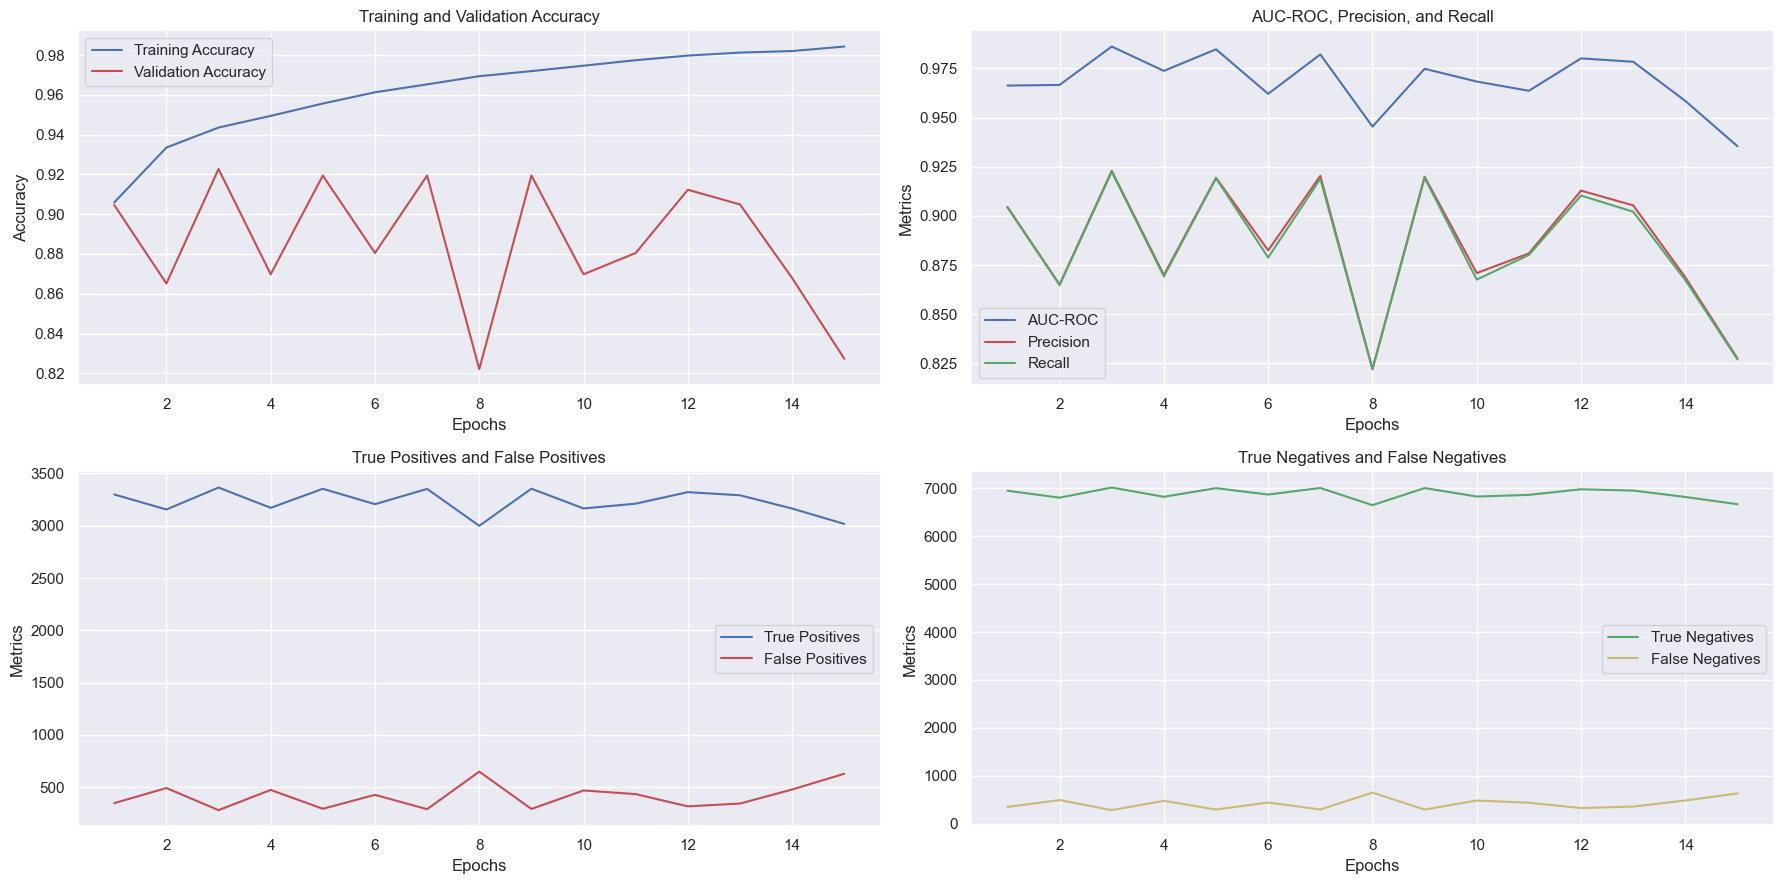

In [44]:
plot_all_metrics()

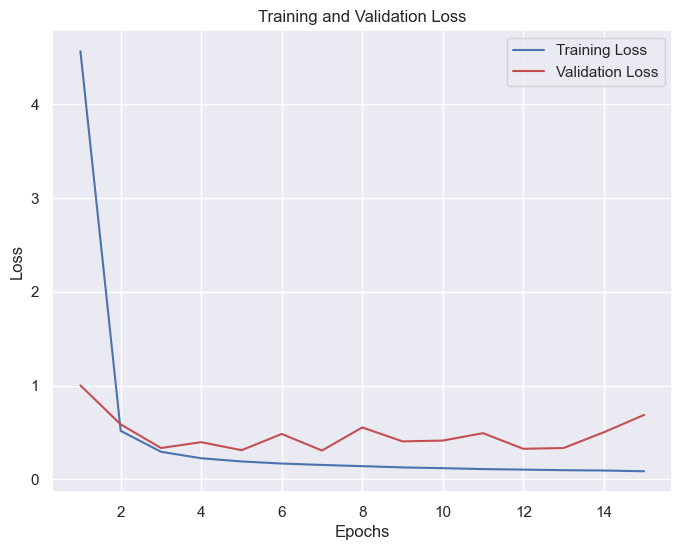

In [45]:
plot_loss()

In [46]:
plot_confusion_matrix_raw_and_classification_report(model)

C:\Users\musan\AppData\Local\Temp\ipykernel_24296\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[1090   43    0]
 [ 577 1406    0]
 [   4    7  521]]
              precision    recall  f1-score   support

           0       0.65      0.96      0.78      1133
           1       0.97      0.71      0.82      1983
           2       1.00      0.98      0.99       532

   micro avg       0.83      0.83      0.83      3648
   macro avg       0.87      0.88      0.86      3648
weighted avg       0.87      0.83      0.83      3648
 samples avg       0.83      0.83      0.83      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_24296\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


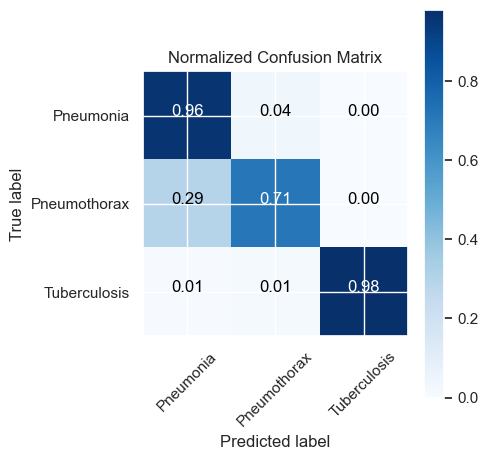

In [47]:
plot_colored_confusion_matrix(model)

In [20]:
best_model = load_model("dialted_modify_final_inceptionV3_multi_best_model.h5")

In [22]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_14704\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 975  158    0]
 [ 101 1882    0]
 [  10   27  495]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1133
           1       0.91      0.95      0.93      1983
           2       1.00      0.93      0.96       532

   micro avg       0.92      0.92      0.92      3648
   macro avg       0.94      0.91      0.92      3648
weighted avg       0.92      0.92      0.92      3648
 samples avg       0.92      0.92      0.92      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_14704\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


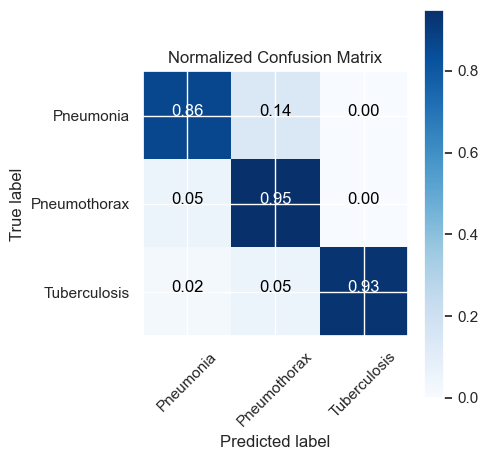

In [25]:
plot_colored_confusion_matrix(best_model)

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

# Load the pre-trained InceptionV3 model with weights pre-trained on ImageNet
base_model = InceptionV3(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze all layers by default
for layer in base_model.layers:
    layer.trainable = False



last_layer = base_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = Conv2D(filters=768, kernel_size=(3, 3), activation='relu', padding='same')(last_output)
x = BatchNormalization()(x)
x = Conv2D(filters=1024, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

# Unfreeze the last 10 layers

# Flatten the output layer to 1 dimension
x = GlobalAveragePooling2D()(x)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x) 

x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2
#x = Dropout(0.2)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
# Add a dropout rate of 0.2

# Add a final sigmoid layer for classification
output = Dense(3, activation='softmax')(x)

# Create your custom model
model = Model(inputs=base_model.input, outputs=output)

model.summary()


last layer output shape:  (None, 12, 12, 768)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )               

In [20]:
from tensorflow.keras.optimizers import Adamax

#opt = RMSprop(learning_rate=0.001)
#opt = SGD(lr= 0.00006, momentum=0.9)
opt = Adamax(lr= 0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
    # Compile model
METRICS = [
      keras.metrics.CategoricalAccuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
  ]

model.compile(loss='categorical_crossentropy', optimizer= opt ,metrics=[METRICS])

checkpoint_filepath = 'conv_modify_final_inceptionV3_multi_best_model_3.h5'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',  # Monitor validation loss
    mode='min',
    verbose=1
)

history = model.fit(
      train_generator,
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      shuffle=True,
      #class_weight=dict(enumerate(class_weights)),
      callbacks=[model_checkpoint_callback]
      )

c:\Users\musan\.conda\envs\thesis\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/30
5636/5636 [==============================] - ETA: 0s - loss: 4.6818 - accuracy: 0.8862 - tp: 39351.0000 - fp: 4568.0000 - tn: 85606.0000 - fn: 5736.0000 - precision: 0.8960 - recall: 0.8728 - auc: 0.9772
Epoch 1: val_loss improved from inf to 0.83080, saving model to conv_modify_final_inceptionV3_multi_best_model_3.h5
5636/5636 [==============================] - 973s 170ms/step - loss: 4.6818 - accuracy: 0.8862 - tp: 39351.0000 - fp: 4568.0000 - tn: 85606.0000 - fn: 5736.0000 - precision: 0.8960 - recall: 0.8728 - auc: 0.9772 - val_loss: 0.8308 - val_accuracy: 0.9106 - val_tp: 3306.0000 - val_fp: 309.0000 - val_tn: 6987.0000 - val_fn: 342.0000 - val_precision: 0.9145 - val_recall: 0.9062 - val_auc: 0.9851
Epoch 2/30
5636/5636 [==============================] - ETA: 0s - loss: 0.5542 - accuracy: 0.9080 - tp: 40668.0000 - fp: 3860.0000 - tn: 86314.0000 - fn: 4419.0000 - precision: 0.9133 - recall: 0.9020 - auc: 0.9856
Epoch 2: val_loss improved from 0.83080 to 0.40901, saving 

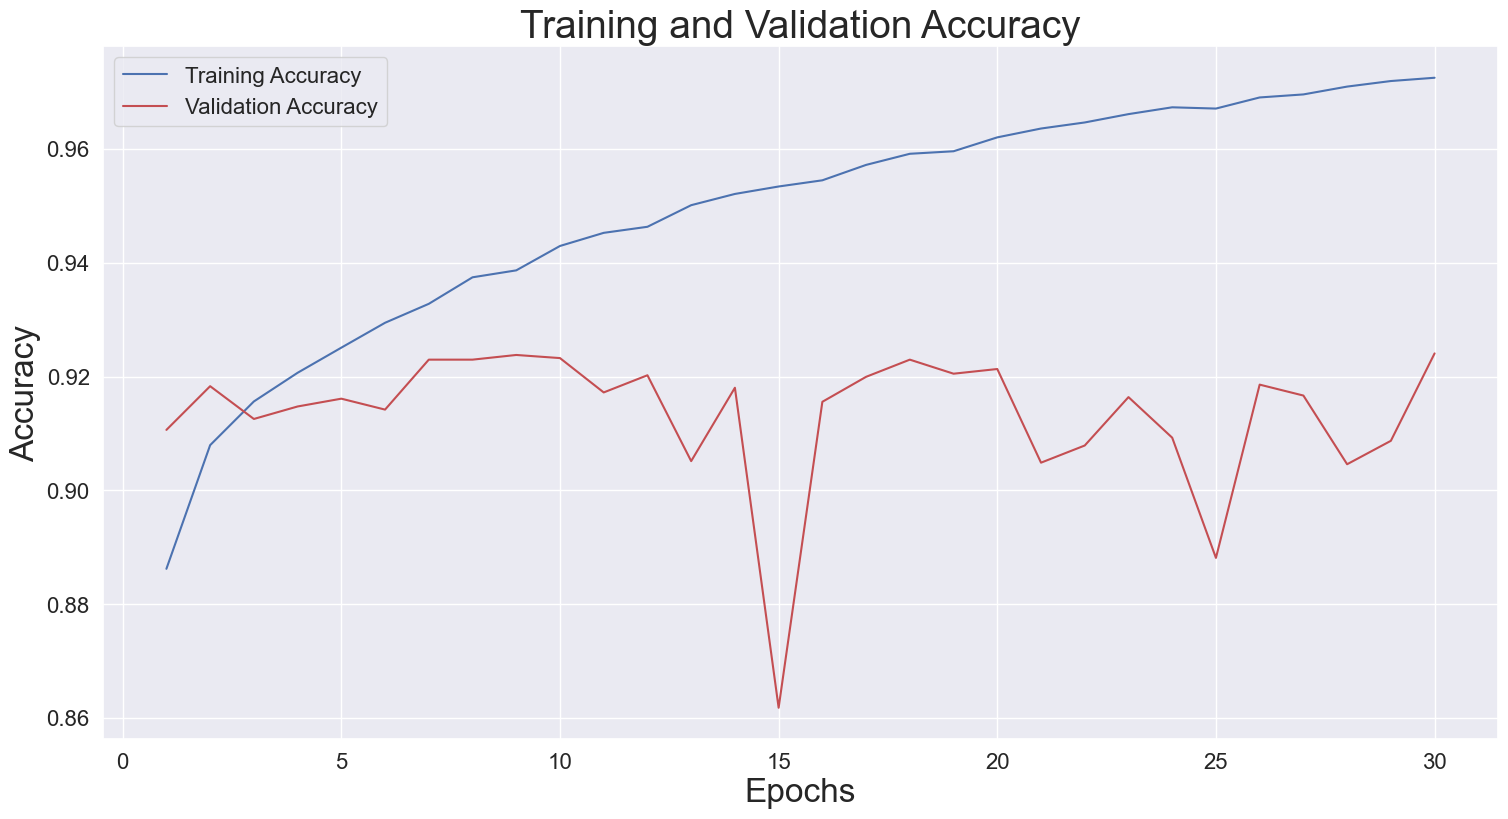

In [21]:
plot_accuracy()

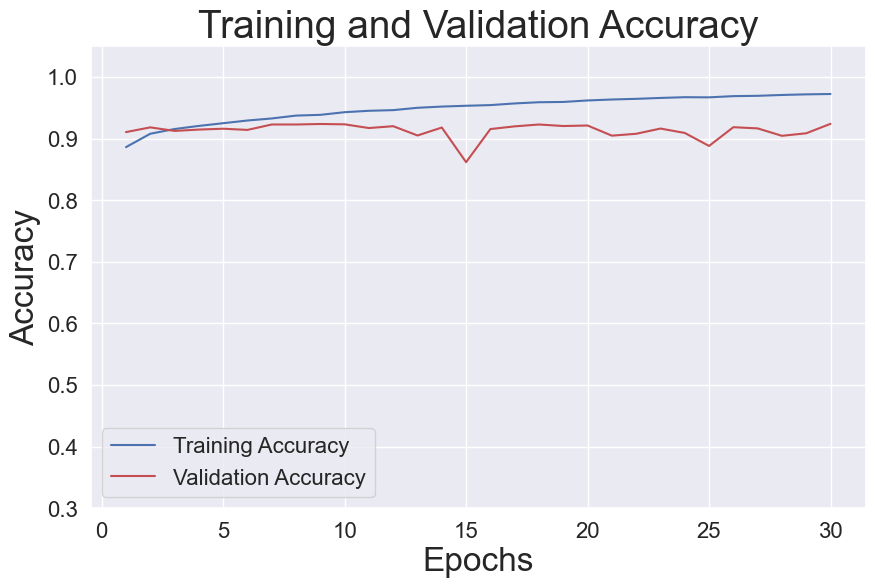

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a list of epoch numbers
epochs = range(1, len(accuracy) + 1)

# Plot the metrics
plt.figure(figsize=(10, 6))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.xlabel('Epochs', fontsize=24)  # Set fontsize for x-axis label
plt.ylabel('Accuracy', fontsize=24)  # Set fontsize for y-axis label
plt.title('Training and Validation Accuracy', fontsize=28)  # Set fontsize for title
plt.legend(prop={'size': 16}, loc='lower left')  # Set fontsize for legend

plt.xticks(fontsize=16)  # Set fontsize for x-axis ticks
plt.yticks(fontsize=16)

plt.ylim(0.3, 1.05)  # Set x-axis limit from 0.5 to the length of accuracy

plt.show()

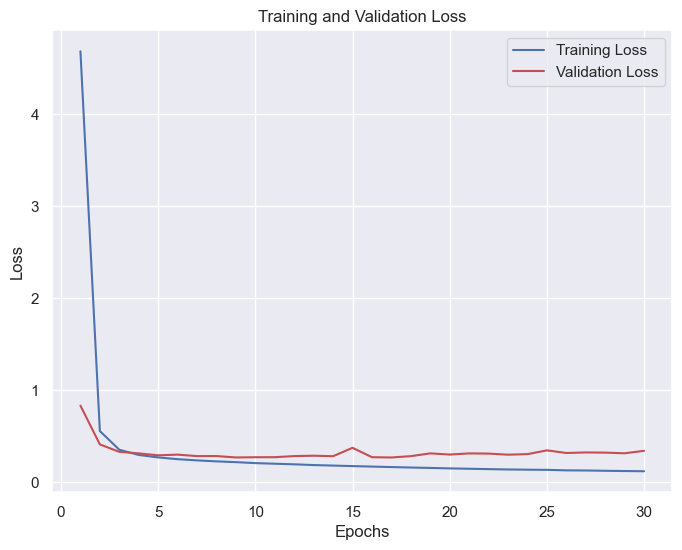

In [27]:
plot_loss()

In [29]:
plot_confusion_matrix_raw_and_classification_report(model)

C:\Users\musan\AppData\Local\Temp\ipykernel_17252\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 908  225    0]
 [  33 1950    0]
 [   4   16  512]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1133
           1       0.89      0.98      0.93      1983
           2       1.00      0.96      0.98       532

   micro avg       0.92      0.92      0.92      3648
   macro avg       0.95      0.92      0.93      3648
weighted avg       0.93      0.92      0.92      3648
 samples avg       0.92      0.92      0.92      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_17252\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


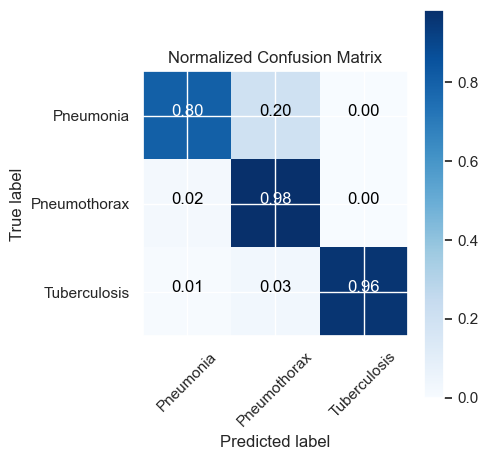

In [30]:
plot_colored_confusion_matrix(model)

In [23]:
best_model = load_model('conv_modify_final_inceptionV3_multi_best_model_2.h5')

In [24]:
plot_confusion_matrix_raw_and_classification_report(best_model)

C:\Users\musan\AppData\Local\Temp\ipykernel_19244\1318306221.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


Confusion Matrix:
[[ 948  184    1]
 [ 117 1863    3]
 [   5    8  519]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1133
           1       0.91      0.94      0.92      1983
           2       0.99      0.98      0.98       532

   micro avg       0.91      0.91      0.91      3648
   macro avg       0.93      0.92      0.92      3648
weighted avg       0.91      0.91      0.91      3648
 samples avg       0.91      0.91      0.91      3648



c:\Users\musan\.conda\envs\thesis\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\musan\AppData\Local\Temp\ipykernel_19244\2143399934.py:11: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator).round()


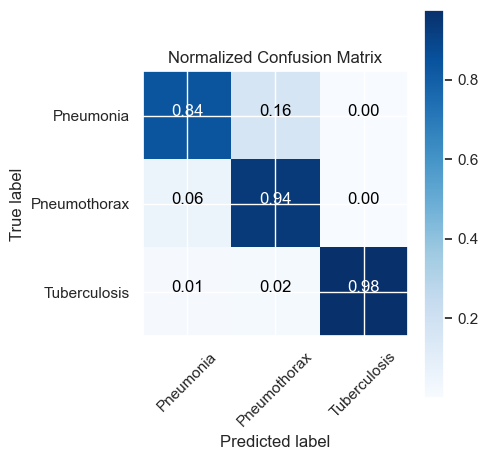

In [25]:
plot_colored_confusion_matrix(best_model)

In [6]:
classification_report_str = {'0': {'precision': 0.98,
       'recall': 1.00,
       'f1-score': 0.99,
       'support': 3840},
       '1': {'precision': 0.99,
       'recall': 0.98,
       'f1-score': 0.99,
       'support': 11846}
       }

In [8]:
labels = ['Abnormal', 'Normal']

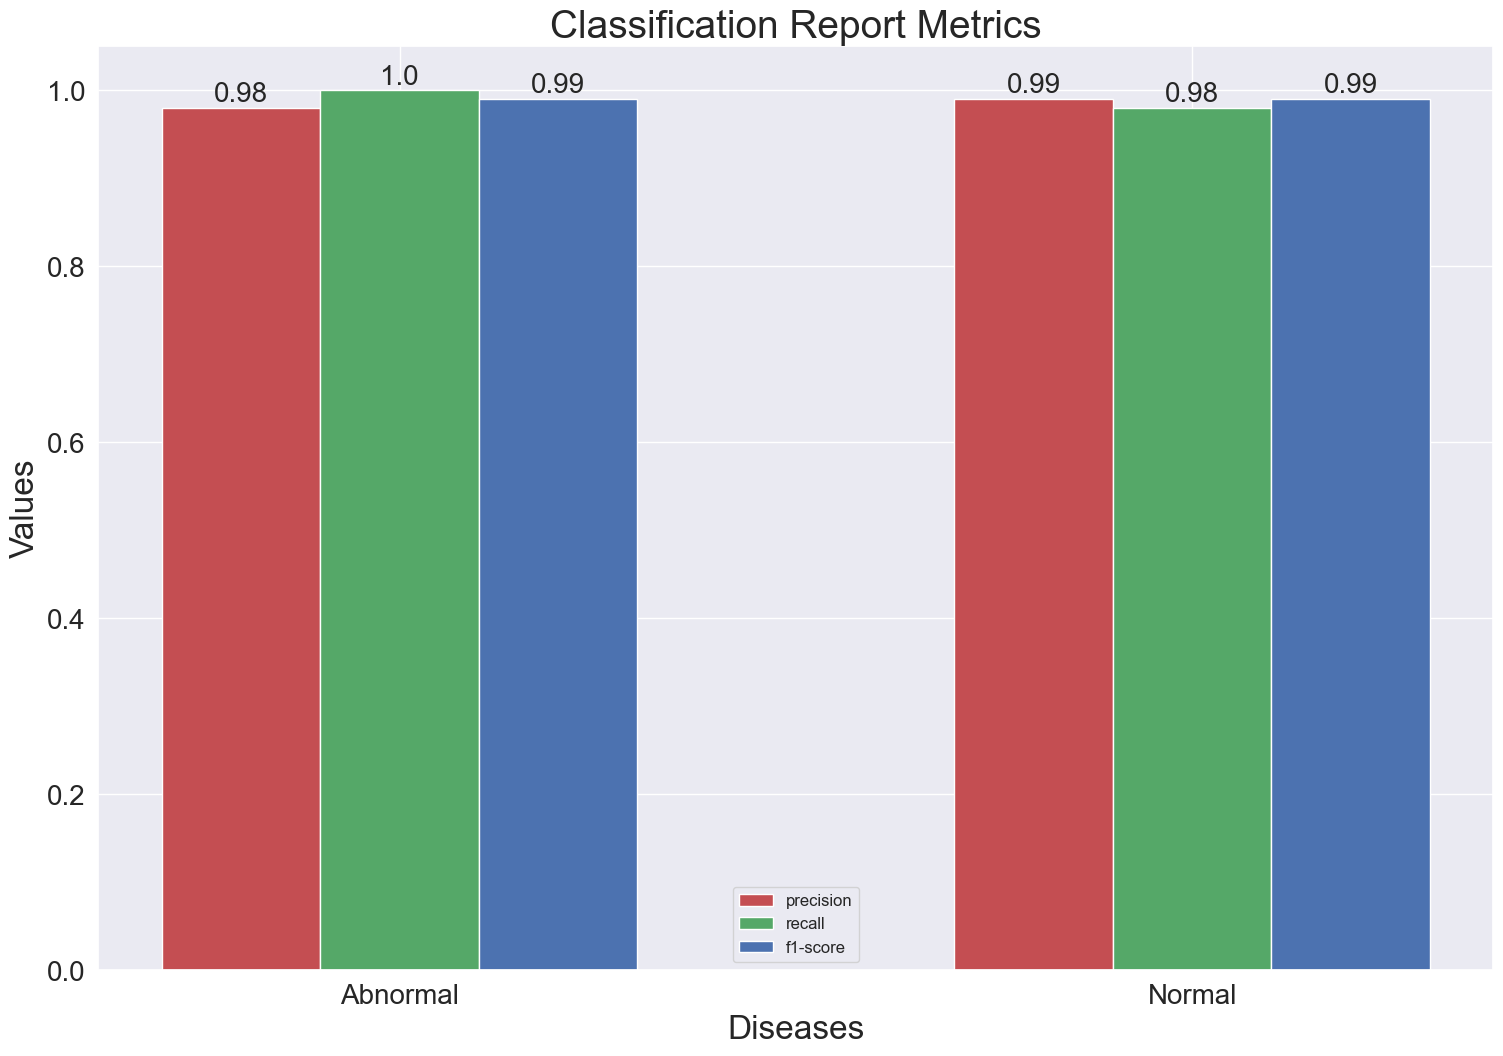

In [12]:
categories = ['0', '1']

metrics = ['precision', 'recall', 'f1-score']
values = np.zeros((len(categories), len(metrics)))

for i, category in enumerate(categories):
    for j, metric in enumerate(metrics):
        values[i, j] = classification_report_str[category][metric]

# Create bar plot
fig, ax = plt.subplots(figsize=(18,12))

bar_width = 0.2
index = np.arange(len(categories))
colors = ['r', 'g', 'b']

for i in range(len(metrics)):
    ax.bar(index + i * bar_width,
           values[:, i], bar_width, label=metrics[i], color=colors[i])
    for j, value in enumerate(values[:, i]):
        ax.text(index[j] + i * bar_width, value, str(round(value, 2)),
                ha='center', va='bottom', fontsize=20)

ax.set_xlabel('Diseases', fontsize=24)
ax.set_ylabel('Values', fontsize=24)
ax.set_title('Classification Report Metrics', fontsize=28)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(labels, fontsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.legend(fontsize=12)

plt.show()

# SMOTE augmentation

In [3]:
import pandas as pd
from collections import Counter

import numpy as np
import os
import sys
from shutil import copyfile
import os.path
import cv2
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array,load_img
from PIL import Image
from sklearn.model_selection import train_test_split
from numpy import load
import matplotlib.pyplot as plt
import imblearn


imagegen = ImageDataGenerator()

# load train data from drive
directory = r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\2nd part of thesis dataset\4 diseases\Cat and Car"

train_generator=imagegen.flow_from_directory(directory, class_mode="categorical", shuffle=False, batch_size=8, target_size=(224, 224),seed=42 )
x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])
y=np.concatenate([train_generator.next()[1] for i in range(train_generator.__len__())])
print(x.shape)
print(y.shape)

#Converting  our color images to a vector
x=x.reshape(x.shape[0],224*224*3)


#Apply SMOTE method 
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=1, k_neighbors=3)
X_smote, y_smote = sm.fit_resample(x, y)

#Retrieve the image and save it to drive. Here's an example for a single image
Xsmote_img=X_smote.reshape(X_smote.shape[0],224,224,3)
last_half = int(Xsmote_img.shape[0]/2)
Xsmote_img = Xsmote_img[-(last_half-5):]

#pil_img = array_to_img(Xsmote_img[40]* 255)
#pil_img.save(r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\2nd part of thesis dataset\4 diseases\SMOTE images\TOM_demo2.png")

#Save all images generated by the SMOTE method to the drive

train_sep_dir=r"D:\Laptop Documents\pdf\4-2\THESIS\dataset\2nd part of thesis dataset\4 diseases\SMOTE cat images"

# Ensure that the directory exists, otherwise create it
if not os.path.exists(train_sep_dir):
    os.makedirs(train_sep_dir)

# Loop over each image generated by SMOTE
for i in range(len(Xsmote_img)):
    # Convert the image array to a PIL image
    pil_img = array_to_img(Xsmote_img[i] * 255)
    
    # Define the filename for the image
    filename = os.path.join(train_sep_dir, f"smote_image_{i}.png")

    # Save the image to the directory
    pil_img.save(filename)

print("All SMOTE augmented images saved successfully!")


Found 15 images belonging to 2 classes.


(15, 224, 224, 3)
(15, 2)
All SMOTE augmented images saved successfully!
